## Problem Information

**Dataset:** Students' Dropout and Academic Success

**Source:** [UCI Machine Learning Repository] (https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)

**Task:** Supervised Learning Problem - Classification


This dataset contains student records with features related to their demographics, academic performance, and enrollment. 

**Target Variable:** Indicates whether a student successfully graduated, dropped out, or is still enrolled. 

**Aim:** To predict student outcomes based on these features.

**Additional Notes:** df_temp is used throughout for any substantial changes being carried out within a cell that may impact other cells.

## Importing Libraries

In [34]:
# Data Manipulation and Analysis 
import pandas as pd
#  Visualisations
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go # Interactive treemap graphs    
import textwrap # Text wrap visualisation labels and ticks
import missingno as msno # Null visualisation  
#  Mathematical functions
import numpy as np
# Mapping categorical values to unique integers
from sklearn.preprocessing import LabelEncoder
# Dataset Splitting, Validation, Hyperparameter tuning
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, RandomizedSearchCV, GridSearchCV    
# Imputation (mode) - categorical columns         
from sklearn.impute import SimpleImputer
# Scaler
from sklearn.preprocessing import  MinMaxScaler
# Resampler
from imblearn.over_sampling import SMOTE
# Classification models
from xgboost import XGBClassifier # XGBoost
from sklearn.ensemble import RandomForestClassifier # RF Classification Model
from sklearn.svm import SVC # Support Vector Machine Classifier
from sklearn.naive_bayes import GaussianNB # Naive Bayes
# Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
# Format display for metrics model comparison
from IPython.display import display, Markdown
# Hyperparameter tuning, Randomized Search random parameter range
from scipy.stats import randint, uniform, loguniform
import pickle # Save model
import os # Save to directory

## Data Acquistion and Initial Preparation

### Dataset Import

In [35]:
# Read CSV dataset into a DataFrame
df = pd.read_csv("data/data.csv", delimiter=";")
# Check sample of first 5 rows
df.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [36]:
# Inspect column datatypes 
df.dtypes.reset_index().rename(columns={"index":"Column", 0:"Datatype"})

,Column,Datatype
0,Marital status,int64
1,Application mode,int64
2,Application order,int64
3,Course,int64
4,Daytime/evening attendance\t,int64
5,Previous qualification,int64
6,Previous qualification (grade),float64
7,Nacionality,int64
8,Mother's qualification,int64
9,Father's qualification,int64


In [37]:
# Rename columns for clarity
df.rename(columns = {'Nacionality':'Nationality', 'Age at enrollment':'Age', 'Daytime/evening attendance\t':'Daytime/Evening', 'Target': 'Student outcome'}, inplace = True)

In [38]:
# Check if any initial null values are present
df.isnull().any().any()

np.False_

## Exploratory Data Analysis (EDA)

In [39]:
# Create a copy of the dataset
df_eda = df.copy(deep=True)

# Dataset Summary Information 
df_eda.info()
# Descriptive Statistics
df_eda.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/Evening                                 4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/Evening,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nationality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


#### Feature Mappings

In [40]:
# Number of unique non-binary categories - columns that may require aggregation 
df_eda.nunique()[(df_eda.nunique() > 2) # Filter > 2 
                               & (~df_eda.nunique().index.str.contains("grade|units|rate|GDP", case=False)) # Exclude numerical variables i.e. 'grade' 
                               & (~df_eda.nunique().index.isin(["Age", "Application order", "Target"]))]

Marital status             6
Application mode          18
Course                    17
Previous qualification    17
Nationality               21
Mother's qualification    29
Father's qualification    34
Mother's occupation       32
Father's occupation       46
Student outcome            3
dtype: int64

In [41]:
# Feature mappings (for aggregation purposes)
# Marital Status
marital_mapping = {
    1: "Single",
    2: "Married",
    3: "Widower",
    4: "Divorced",
    5: "Common-law marriage",
    6: "Legally separated"
}

# Application Mode
appl_mode_mapping = {
    1: "1st Phase - General Contingent",
    2: "Ordinance No. 612/93",
    5: "1st Phase - Special Contingent (Azores Island)",
    7: "Holders of other higher courses",
    10: "Ordinance No. 854-B/99",
    15: "International student (bachelor)",
    16: "1st Phase - Special Contingent (Madeira Island)",
    17: "2nd Phase - General Contingent",
    18: "3rd Phase - General Contingent",
    26: "Ordinance No. 533-A/99, item b2 (Different Plan)",
    27: "Ordinance No. 533-A/99, item b3 (Other Institution)",
    39: "Over 23 years old",
    42: "Transfer",
    43: "Change of Course",
    44: "Technological Specialization Diploma Holders",
    51: "Change of Institution/Course",
    53: "Short Cycle Diploma Holders",
    57: "Change of Institution/Course (International)"
}

# Nationality 
nationality_mapping = {
    0: "Other", # Class made during feature aggregation
    1: "Portuguese",
    2: "German",
    6: "Spanish",
    11: "Italian",
    13: "Dutch",
    14: "English",
    17: "Lithuanian",
    21: "Angolan",
    22: "Cape Verdean",
    24: "Guinean",
    25: "Mozambican",
    26: "Santomean",
    32: "Turkish",
    41: "Brazilian",
    62: "Romanian",
    100: "Moldovan",
    101: "Mexican",
    103: "Ukrainian",
    105: "Russian",
    108: "Cuban",
    109: "Colombian"
}

# Course 
course_mapping = {
    33: "Biofuel Production Technologies",
    171: "Animation and Multimedia Design",
    8014: "Social Service (Evening)",
    9003: "Agronomy",
    9070: "Communication Design",
    9085: "Veterinary Nursing",
    9119: "Informatics Engineering",
    9130: "Equinculture",
    9147: "Management",
    9238: "Social Service",
    9254: "Tourism",
    9500: "Nursing",
    9556: "Oral Hygiene",
    9670: "Advertising and Marketing Management",
    9773: "Journalism and Communication",
    9853: "Basic Education",
    9991: "Management (Evening)"
}

# Previous/ Mother's/ Father's Qualification
prev_qual_mapping = {
    1: "Secondary Education - 12th Year or Eq.",
    2: "Bachelor's",
    3: "Higher Ed. Degree",
    4: "Master's",
    5: "Doctorate",
    6: "Frequency of Higher Ed.",
    9: "12th Year - Not Completed",
    10: "11th Year - Not Completed",
    11: "7th Year (Old)",
    12: "Other - 11th Year",
    13: "2nd Year Complementary High School",
    14: "10th Year",
    15: "10th Year - Not Completed",
    18: "General Commerce Course",
    19: "Basic Ed. 3rd Cycle (9th–11th)",
    20: "Complementary High School Course",
    22: "Technical-professional Course",
    25: "Complementary High School - Not Concluded",
    26: "7th Year of Schooling",
    27: "2nd Cycle General High School",
    29: "9th Year - Not Completed",
    30: "8th Year",
    31: "General Course of Administration & Commerce",
    33: "Supplementary Accounting & Administration",
    34: "Unknown",
    35: "Illiterate",
    36: "Can Read (without 4th Year)",
    37: "Basic Ed. 1st Cycle",
    38: "Basic Ed. 2nd Cycle",
    39: "Technological Specialization Course",
    40: "Higher Education - Degree (1st Cycle)",
    41: "Specialized Higher Studies Course",
    42: "Professional Higher Technical Course",
    43: "Master (2nd Cycle)",
    44: "Doctorate (3rd Cycle)"
}

# Parent's occupation - shortened for clarity and readbility
occupation_mapping = {
    0: "Student",
    1: "Legislative, Executive, and Managerial Leaders",
    2: "Intellectual and Scientific Specialists",
    3: "Technicians and Professionals (Intermediate)",
    4: "Admin",
    5: "Personal, Security & Sales Workers",
    6: "Agricultural Workers",
    7: "Industry, Construction & Craft Workers",
    8: "Machine Operators & Assemblers",
    9: "Unskilled Workers",
    10: "Armed Forces Professions",
    90: "Other Situation",
    99: "(blank)",
    101: "Armed Forces Officers",
    102: "Armed Forces Sergeants",
    103: "Other Armed Forces Personnel",
    112: "Administrative and Commercial Directors",
    114: "Hotel, Catering & Trade Directors",
    121: "Physical Sciences, Math & Engineering Specialists",
    122: "Health Professionals",
    123: "Teachers",
    124: "Finance, Accounting, Relations, & Admin Specialistss",
    125: "ICT Specialists",
    131: "Science & Engineering Technicians (Intermediate)",
    132: "Health Technicians & Professionals (Intermediate)",
    134: "Legal, Social, Cultural & Sports Technicians (Intermediate)",
    135: "ICT Technicians",
    141: "Office Workers & Secretaries",
    143: "Data, Accounting & Registry Operators",
    144: "Admin Support Staff",
    151: "Personal Service Workers",
    152: "Sellers",
    153: "Care Workers",
    154: "Security Services Personnel",
    161: "Market-oriented Farmers & Skilled Agricultural Workers",
    163: "Subsistence Farmers, Fishers & Hunters",
    171: "Construction Workers",
    172: "Metallurgy & Metalworking Workers",
    173: "Artisan Workers",
    174: "Electrical & Electronics Workers",
    175: "Food, Wood, Clothing, and Other Craft Workers",
    181: "Plant Machinery Operators",
    182: "Assembly Workers",
    183: "Vehicle and Mobile Equipment Operators",
    191: "Cleaning Workers",
    192: "Unskilled Agricultural and Forestry",
    193: "Unskilled Industry, Construction, and Transport Workers",
    194: "Meal Prep Assistants",
    195: "Street Vendors & Service Providers Excl. Food"
}

gender_mapping ={
    1: "Male", 
    0: "Female"
}

# Combine to keyed dictionary - Column to Mapping
feature_mappings = {
    "Marital status": marital_mapping,
    "Application mode": appl_mode_mapping,
    "Nationality": nationality_mapping,
    "Course": course_mapping,
    "Previous qualification": prev_qual_mapping,
    "Mother's qualification": prev_qual_mapping,
    "Father's qualification": prev_qual_mapping,
    "Mother's occupation": occupation_mapping,
    "Father's occupation": occupation_mapping,
    "Gender": gender_mapping
}

In [42]:
# Ensure and validate mapped codes align with values in the DataFrame
def cross_ref_mappings(column_name, df=df_eda, mappings=feature_mappings):
    try:
        # Unique feature codes
        target_codes = set(df[column_name].unique())
        # Mapped codes
        mapped_codes = set(feature_mappings[column_name].keys())
        # Check for missing codes in mapping from df
        missing_codes = target_codes - mapped_codes
        
        # Return attribute, names of missing codes, True/False
        return column_name, missing_codes, bool(missing_codes)
        
    except KeyError:
        raise Exception("Mapping does not exist for this column!")
    
# Check each feature with a mapping from combined dict 
col_params = []
for key in feature_mappings:
    col_params.append(key)

missing_results = "Missing codes for" # Concatenate missing codes for columns
non_missing_cols = "No missing codes for" # Concatenate non-missing columns
missing_count = 0 # Missing count

for col in col_params:
    column_name, missing_codes, missing = cross_ref_mappings(col)
    if missing:
        missing_results += ", " + column_name + ": " + ", ".join(str(v) for v in missing_codes)
        missing_count += 1
    else: 
        non_missing_cols += ", " + column_name

ref_results = "" # Concatenate full results

# Shows if any mappings are missing
if missing_count > 0:
    ref_results += missing_results + "."
# If mappings are not missing for column(s)
ref_results += "\n" + non_missing_cols + "."

print(ref_results)


No missing codes for, Marital status, Application mode, Nationality, Course, Previous qualification, Mother's qualification, Father's qualification, Mother's occupation, Father's occupation, Gender.


In [43]:
sns.set_style("whitegrid") # Set style for plots

### Univariate Analysis

#### Target Variable

##### Distribution

In [44]:
def countplot_distribution(df, labels, column='Student outcome'):
    """
    count_plot_distribution plots a count graph for the 
    classes in a single categorical variable (x-axis) against 
    the count of each class (y-axis).

    ---- Parameters ----
    :df: Specified pandas DataFrame containing the data to plot.
    :labels: The classes to be plot as a bar on the x-axis.
    :column: Optional name of column to plot, target as default.
    """
    df_plot = df.copy() # Copy to not alter original 

    # Count plot of target variable
    plt.figure(figsize=(7,6))
    ax = sns.countplot(
        data=df_plot, 
        x=column, 
        palette='Set2'
    )

    # Plot labels
    column = column.title() # Capitalise title
    ax.set_title(f'Distribution of {column} Classes (Target Variable)')
    ax.set_xlabel(f'{column}')
    ax.set_ylabel('Count')
    ax.set_xticklabels(labels)

    
    # Count of each bar as label
    for container in ax.containers:
        ax.bar_label(container, fmt='{:.0f}', label_type='edge')

    # Plot graph
    plt.tight_layout()
    plt.show()

C:\Users\evakt\AppData\Local\Temp\ipykernel_25944\4048595414.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
C:\Users\evakt\AppData\Local\Temp\ipykernel_25944\4048595414.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


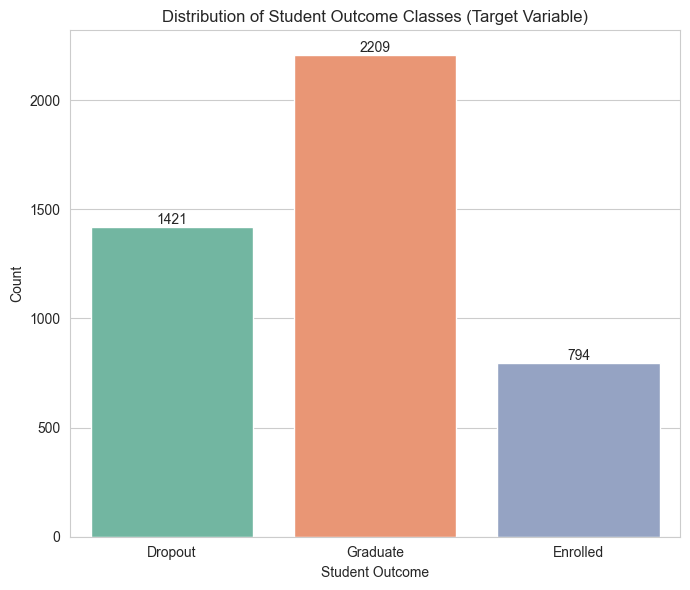

Student outcome
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [45]:
# Student Outcome (Target) Distribution
countplot_distribution(df_eda, ('Dropout', 'Graduate', 'Enrolled'))
df['Student outcome'].value_counts() # Check values match-up against original

C:\Users\evakt\AppData\Local\Temp\ipykernel_25944\4048595414.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
C:\Users\evakt\AppData\Local\Temp\ipykernel_25944\4048595414.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


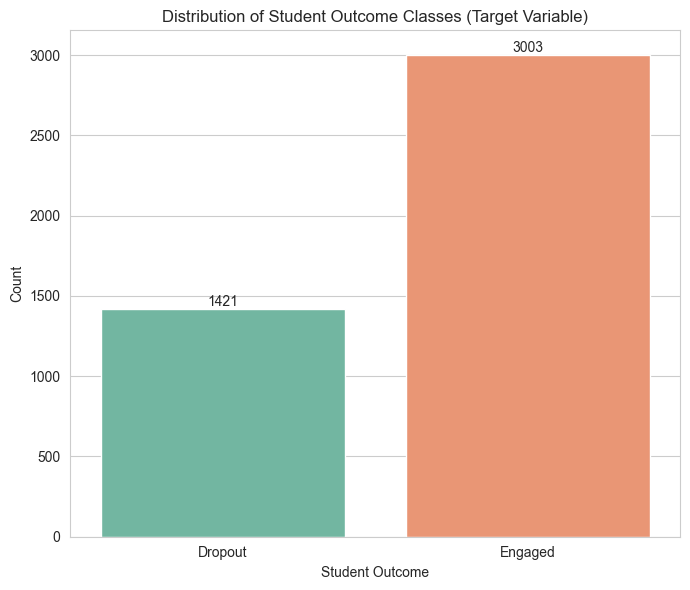

In [46]:
# Target combined distribution
df_temp = df_eda.copy()
df_temp['Student outcome'] = df_temp['Student outcome'].replace({
    'Graduate':'Engaged',
    'Enrolled':'Engaged',
    'Dropout':'Dropout'
})
countplot_distribution(df_temp, ('Dropout', 'Engaged'))
df['Student outcome'].value_counts() # Check values match-up against original

# Assert original vs combined checks 
assert df.shape[1] == df_temp.shape[1], "Mismatch in total rows!" # Number of rows
# Number of Graduate - orig == combined
assert df['Student outcome'].value_counts()['Graduate'] + df['Student outcome'].value_counts()['Enrolled']
# Number of Dropout - orig == combined
assert df['Student outcome'].value_counts()['Dropout'] == df_temp['Student outcome'].value_counts()['Dropout'], "Mismatch in Dropout count!"

In [47]:
df_eda.nunique()

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/Evening                                     2
Previous qualification                             17
Previous qualification (grade)                    101
Nationality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Admission grade                                   620
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder          

In [48]:
# Numerical (Continuous) vs Categorical Data 
# Categorical columns 
df_categorical = df_eda[
    df_eda.columns[
        (~df_eda.nunique().index.str.contains("grade|units|rate|GDP", case=False))
        & (~df_eda.nunique().index.isin(["Age", "Application order"]))
    ] # Does not contain the above words or columns
]

# Numerical columns df
df_numerical = df_eda[
    df_eda.columns[
        df_eda.nunique().index.str.contains("grade|units|rate|GDP", case=False)
        | df_eda.nunique().index.isin(["Age", "Application order"])
    ] # Contains the above words and columns
]

# Validate through assertions
# No overlap
assert set(df_categorical.columns).isdisjoint(set(df_numerical.columns)), "Overlap found!"
# All columns are accounted for in both dataframes (excl. Target)
df_temp.drop("Target", axis=1, inplace=True, errors='ignore')
assert set(df_categorical.columns).union(df_numerical.columns) == set(df_eda.columns), "Missing columns!"

In [49]:
df_categorical.columns

Index(['Marital status', 'Application mode', 'Course', 'Daytime/Evening',
       'Previous qualification', 'Nationality', 'Mother's qualification',
       'Father's qualification', 'Mother's occupation', 'Father's occupation',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'International', 'Student outcome'],
      dtype='object')

In [50]:
df_numerical.columns

Index(['Application order', 'Previous qualification (grade)',
       'Admission grade', 'Age', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP'],
      dtype='object')

In [51]:
missing_cols = set(df_temp.columns) - set(df_categorical.columns).union(set(df_numerical.columns))
print("Missing columns:", missing_cols)

Missing columns: set()


#### Continuous Attributes

In [52]:
# Calculate mean reference line for histogram
def hist_mean(data, **kwargs):
    sns.histplot(data['Value'], kde=True, **kwargs)
    plt.axvline(data['Value'].mean(), color='red', linestyle='dashed', linewidth=2) # Mean line

# Create facet grids combining plots
def facet_plots(df, plot_type, col_wrap, title):
    df_numeric = df.select_dtypes(include='number') # Only numeric data

    # Plot Type
    if plot_type == 'box': # Boxplot
        df_melt = df_numeric.melt(var_name='Feature', value_name='Value') # Long format
        # Create facet grid
        gr = sns.FacetGrid(df_melt, col='Feature', col_wrap=col_wrap, 
                           sharex=False, sharey=False, height=3, aspect=1.4)
        gr.map_dataframe(sns.boxplot, y='Value') # Add boxplot to facet 
        gr.set_titles("{col_name}", size=14) # Replace default title
    
    if plot_type == 'hist': # Histogram
        df_melt = df_numeric.melt(var_name='Feature', value_name='Value') # Long format
        # Create facet grid
        gr = sns.FacetGrid(df_melt, col='Feature', col_wrap=col_wrap, 
                           sharex=False, sharey=False, height=3, aspect=1.4)
        gr.map_dataframe(hist_mean) # Add mean ref and histogram to facet
        for ax, feature in zip(gr.axes.flat, df_melt['Feature'].unique()):
            skew_val = df_melt[df_melt['Feature'] == feature]['Value'].dropna().skew()
            ax.set_title(f"{feature} | Skew: {skew_val:.2f}") # Add skew to title

    if plot_type == 'count': # Countplot
        # Melting and facet grid
        df_plot_melt = df.melt(var_name='feature', value_name='class')
        # Facet grid
        gr = sns.FacetGrid(df_plot_melt, col='feature', col_wrap=col_wrap, 
                           sharex=False, sharey=False, height=8, aspect=2)
        # Create count plot individually
        def count_plot(data, **kwargs):
            # Ensure only current xticks by recalc pf order
            order = sorted(data["class"].dropna().unique())
            ax = sns.countplot(data=data, x="class", order=order, palette="Set2", **kwargs)
        gr.map_dataframe(count_plot) # Add count plot to facet
        gr.set_titles("{col_name}", size=14) # Replace default title
            
    # Display final plot
    gr.fig.suptitle(title, size = 16)
    gr.tight_layout()
    plt.show()

##### Boxplots

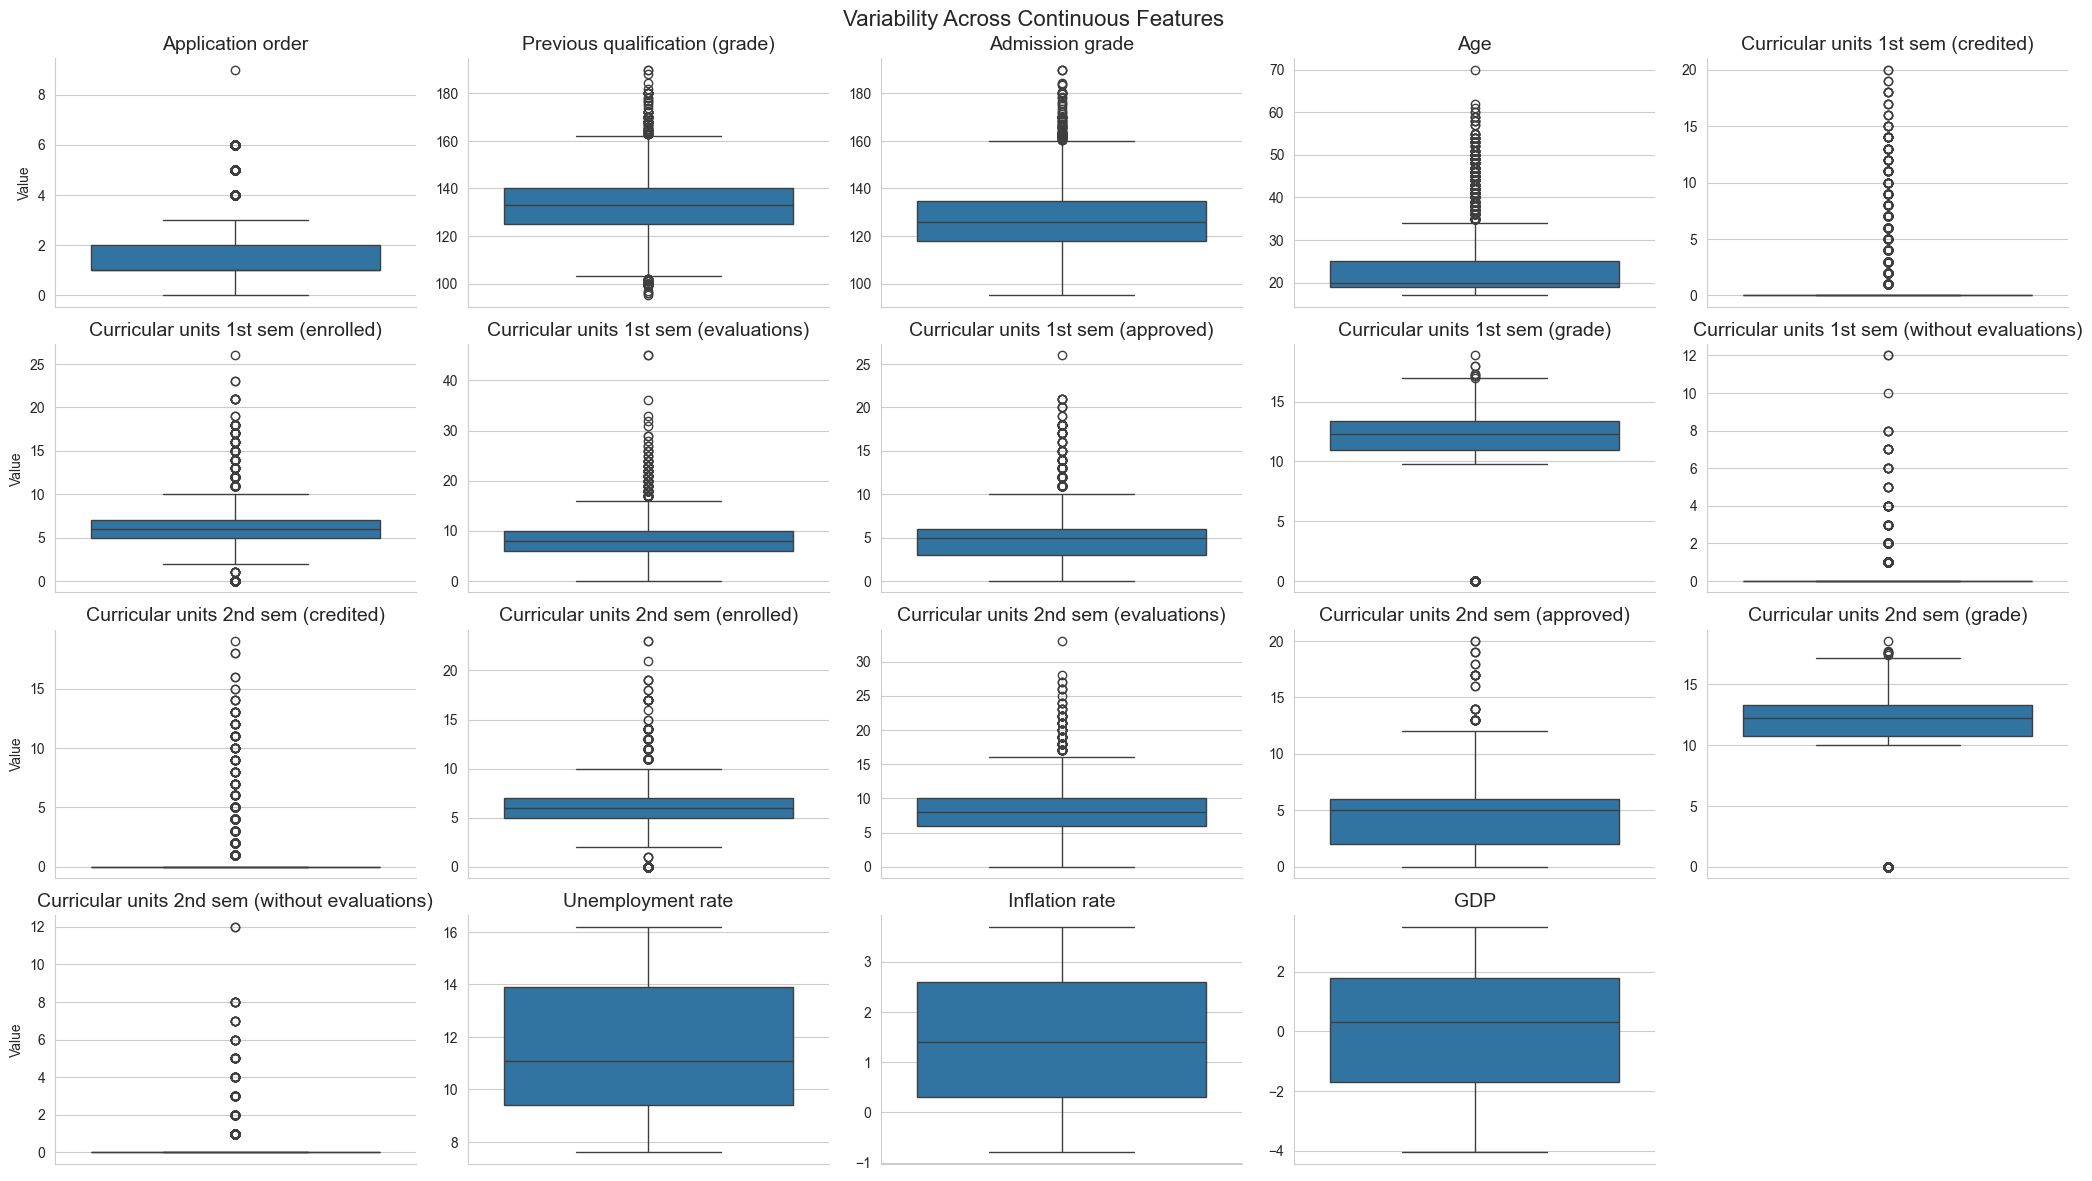

In [53]:
facet_plots(df_numerical, 'box', 5, 'Variability Across Continuous Features')

##### Histograms

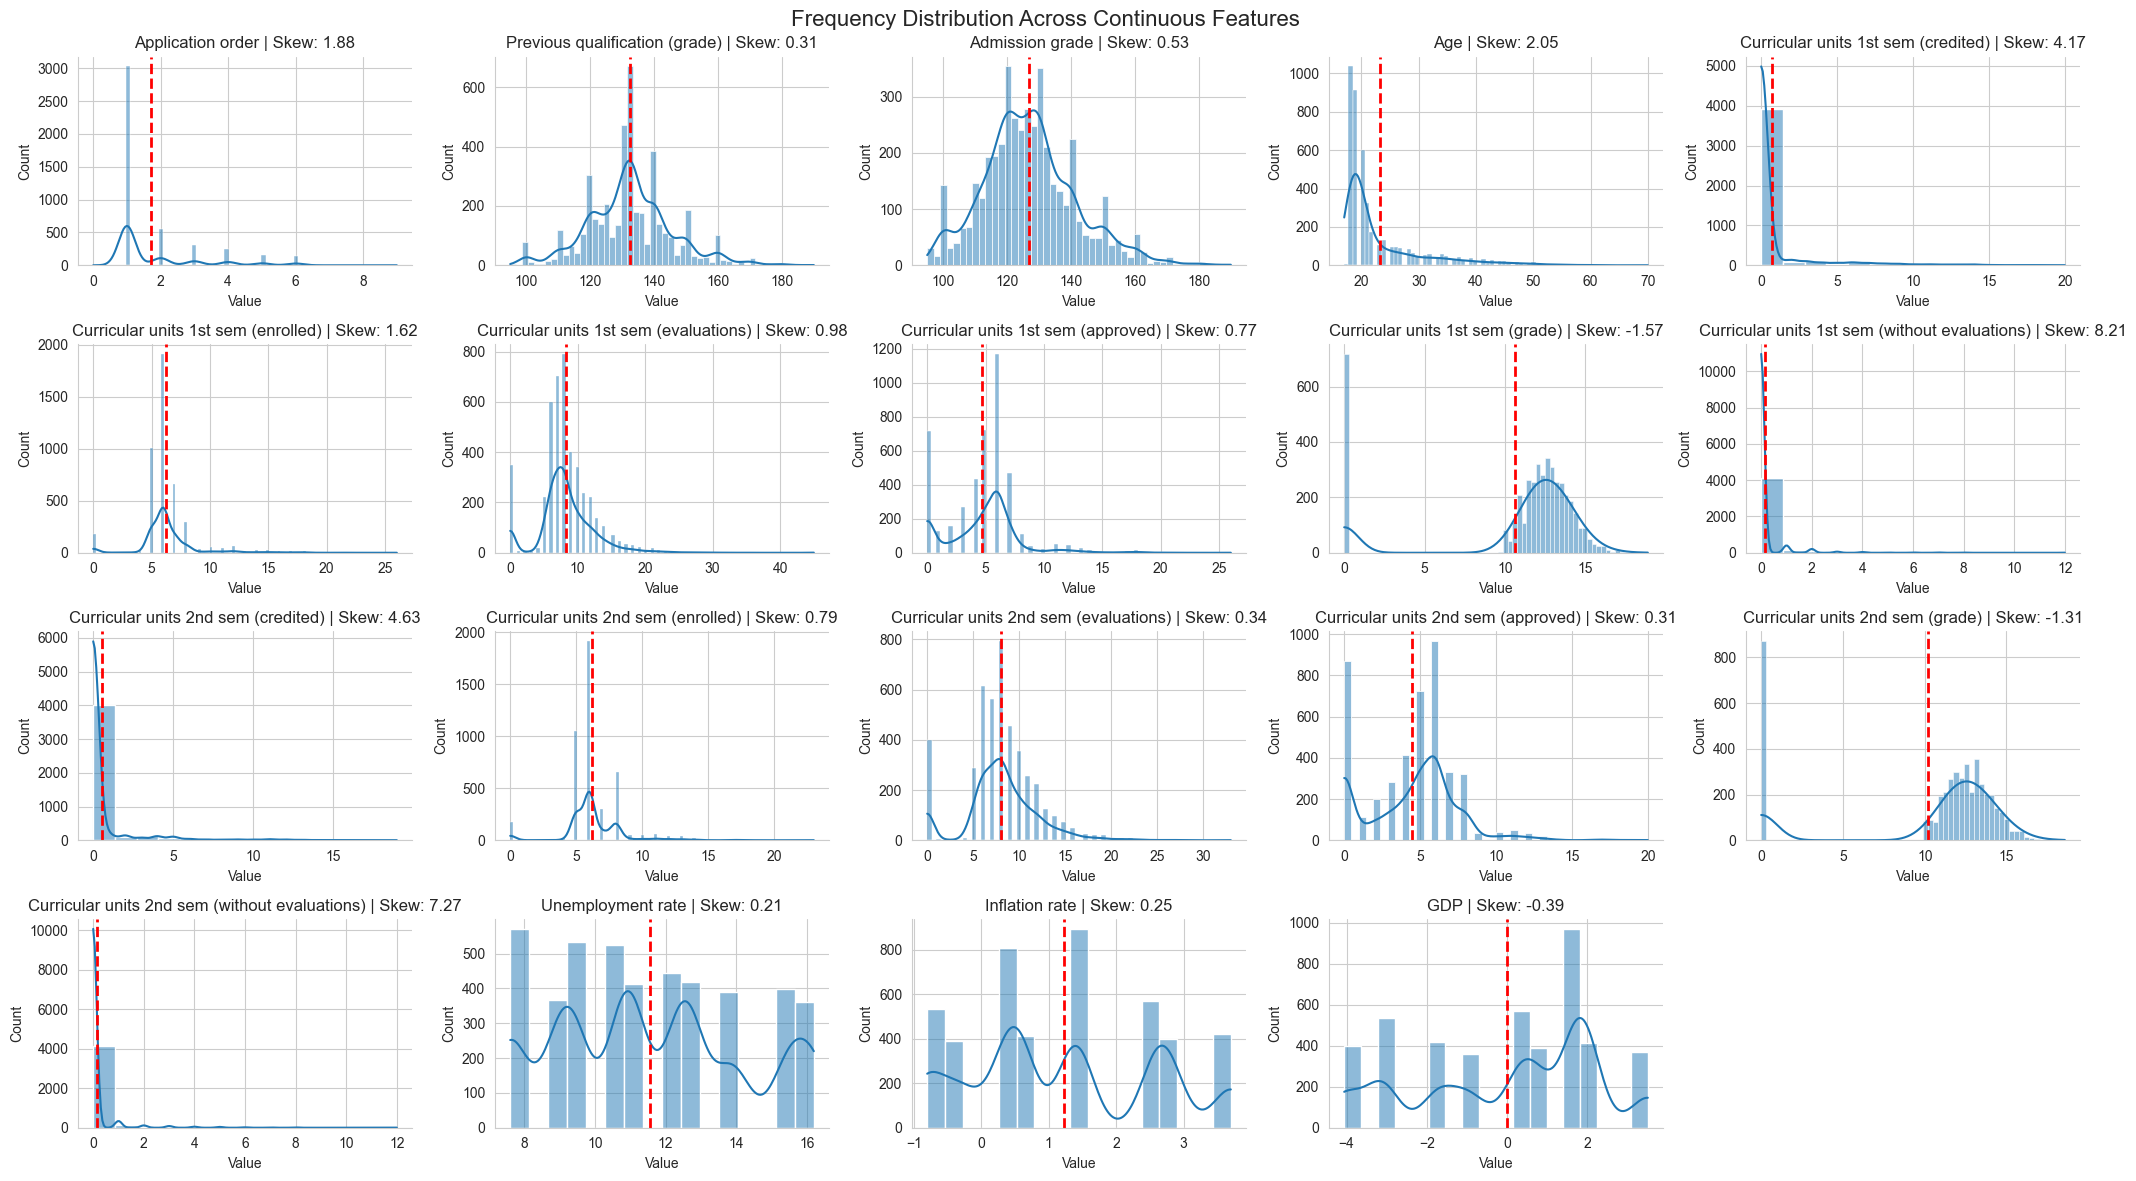

In [54]:
facet_plots(df_numerical, 'hist', 5, 'Frequency Distribution Across Continuous Features')

#### Discrete Attributes

##### Countplots

C:\Users\evakt\AppData\Local\Temp\ipykernel_25944\244515266.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x="class", order=order, palette="Set2", **kwargs)
C:\Users\evakt\AppData\Local\Temp\ipykernel_25944\244515266.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x="class", order=order, palette="Set2", **kwargs)
C:\Users\evakt\AppData\Local\Temp\ipykernel_25944\244515266.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x="class", order=order, palette="Set2", **kwargs)
C:\U

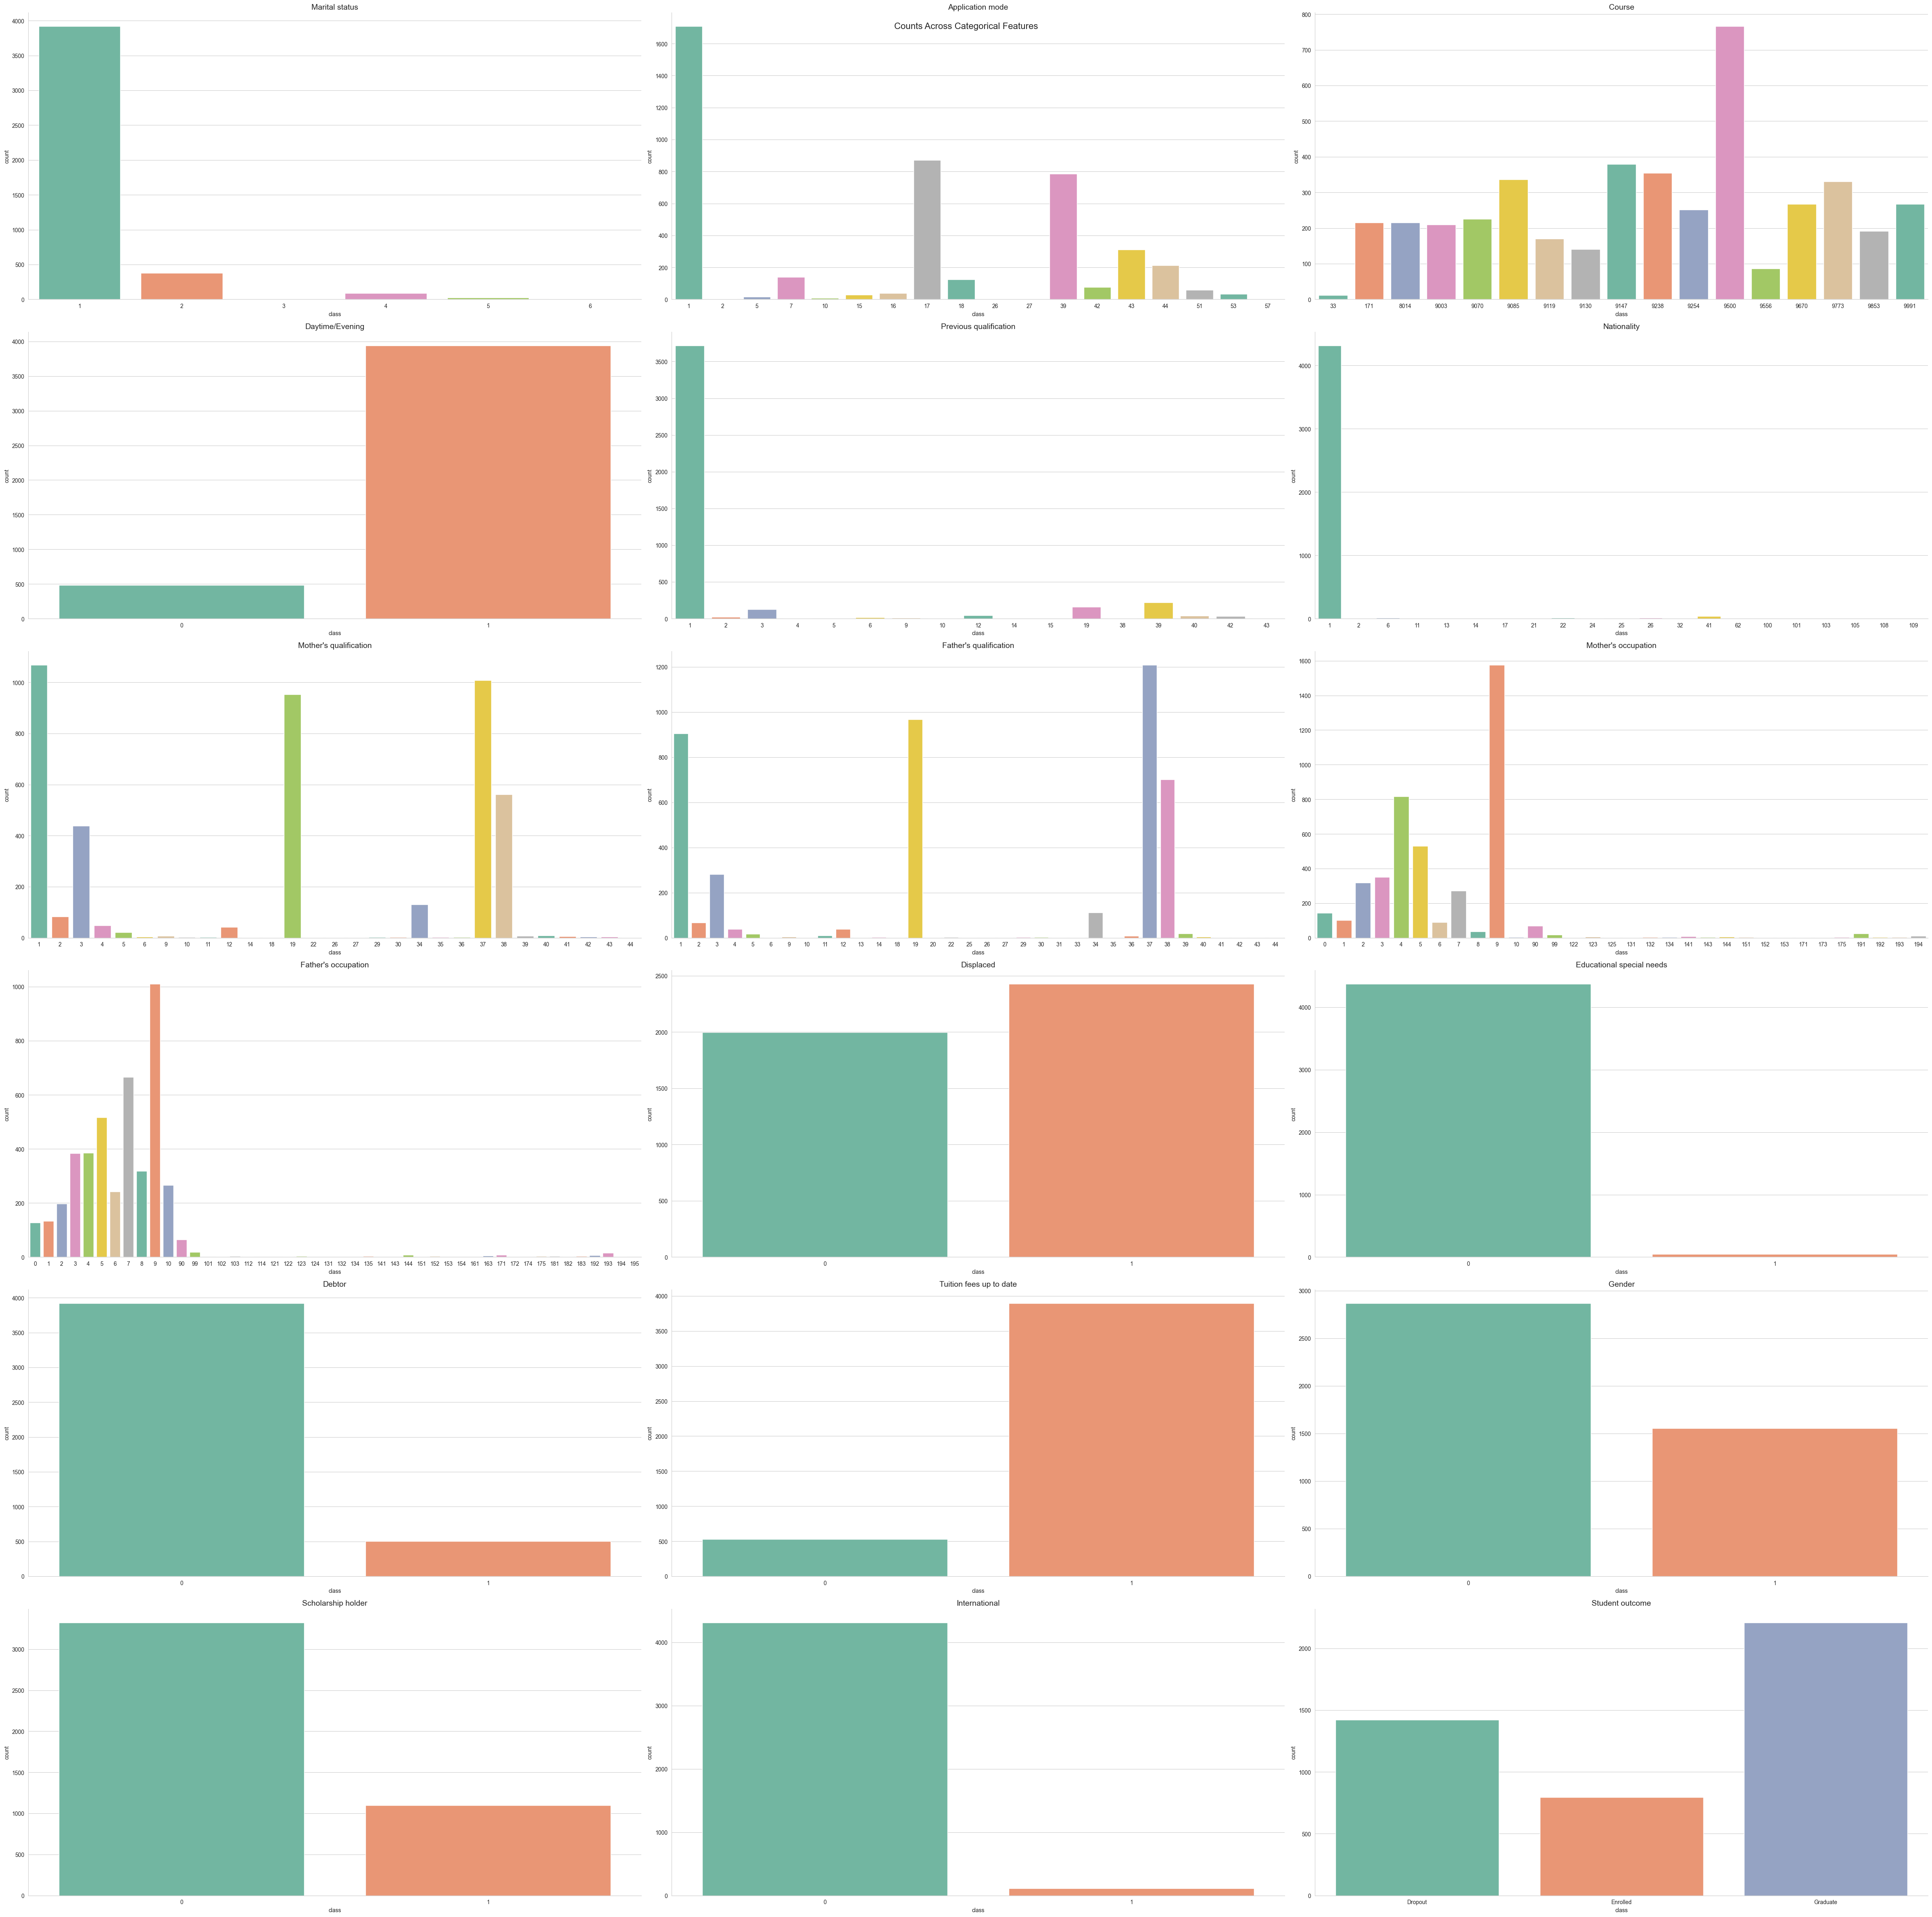

In [55]:
facet_plots(df_categorical, 'count', 3, 'Counts Across Categorical Features')

##### Tree Maps

In [56]:
# Interactive tree maps
def treemap_plot(df, column, mapping=feature_mappings):
    """
    treemap_plot creates ann interactive visualisation as
    a treemap plot to represent the frequency distribution
    of multiclass categories.

    ---- Parameters ----
    :df: Specified pandas DataFrame containing the data to plot.
    :column: Name of column to be plot. 
    :mapping: Dictionary with codes to description mappings with default.
    """
    # Map numeric codes to occupation mappings (descriptive names)
    mapped = df[column].map(mapping[column])
    # Count frequencies of occupations
    counts = mapped.value_counts().reset_index()
    counts.columns = ["Category", "Count"]

    # Build single treemap
    fig = go.Figure(go.Treemap(
        labels=counts["Category"],
        parents=[""] * len(counts),
        values=counts["Count"],
        textinfo="label+value", # Class and count
        name=f"{column} Treemap"
    ))

    # Treemap plot layout
    fig.update_layout(
        title_text=f"Treemap of {column}",
        title_x=0.5,
        margin=dict(t=60, l=0, r=0, b=0),
        showlegend=False,
        height = 900
    )
    fig.show()

##### Father's occupation

In [57]:
treemap_plot(df_categorical, "Father's occupation")

##### Mother's occupation

In [58]:
#treemap_plot(df_categorical, "Mother's occupation")
# Commented to reduce processing time of notebook and navigability

##### Father's qualification

In [59]:
#treemap_plot(df_categorical, "Father's qualification")

##### Mother's qualification

In [60]:
#treemap_plot(df_categorical, "Mother's occupation")

### Bivariate

#### Q1 - How do demographical factors affect student success rates?

##### Stacked Bar

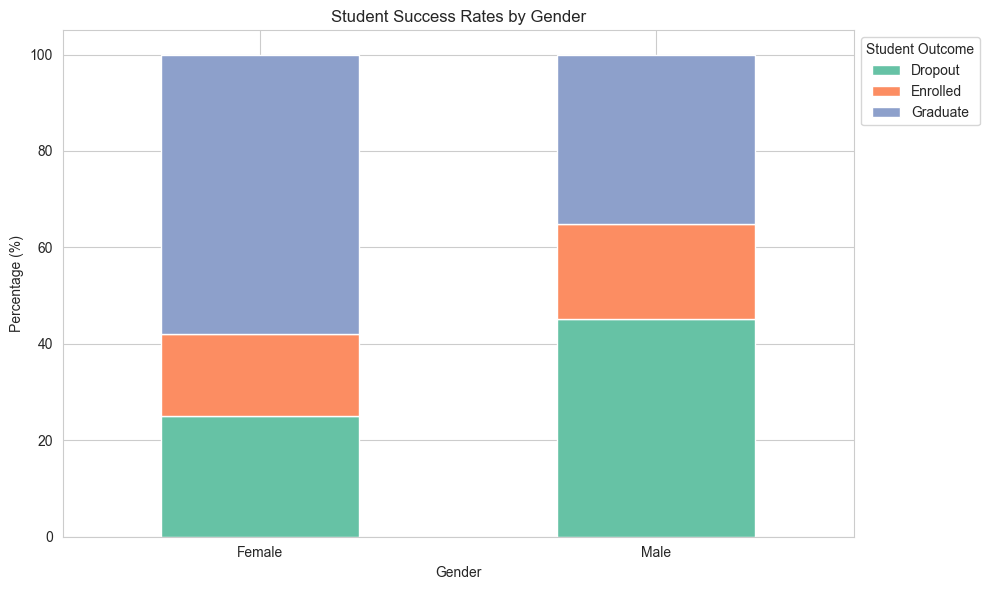

In [61]:
def stacked_bar_success(df, demographic_column, mappings=feature_mappings, target_column='Student outcome'):
    try:
        # Map numeric codes to attribute mappings (descriptive names)
        df[demographic_column] = df[demographic_column].map(mappings[col])
    except KeyError:
        pass

    # Count values of attribute
    counts = df.groupby([demographic_column, target_column]).size().reset_index(name='count')
    
    # Pivot to wide format for stacked plot
    df_pivot = counts.pivot(index=demographic_column, columns=target_column, values='count').fillna(0)
    
    # Normalise to percentages
    df_pivot = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100

    # Set palette by number of categories
    palette = sns.color_palette("Set2", n_colors=df_pivot.shape[1])
    
    # Plot the graph
    ax = df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), color=palette)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
    plt.title(f"Student Success Rates by {demographic_column}")
    plt.ylabel("Percentage (%)")
    plt.xlabel(demographic_column)
    target_column = target_column.title() # Capitalise title
    plt.legend(title=target_column, bbox_to_anchor=(1, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Gender
df_temp = df_eda.copy()
stacked_bar_success(df_temp, 'Gender')


##### Faceted Stacked Bar Charts

C:\Users\evakt\AppData\Local\Temp\ipykernel_25944\2146238217.py:47: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\evakt\AppData\Local\Temp\ipykernel_25944\2146238217.py:47: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\evakt\AppData\Local\Temp\ipykernel_25944\2146238217.py:47: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\evakt\AppData\Local\Temp\ipykernel_25944\2146238217.py:47: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\evakt\AppData\Local\Temp\ipykernel_25944\2146238217.py:47: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\e

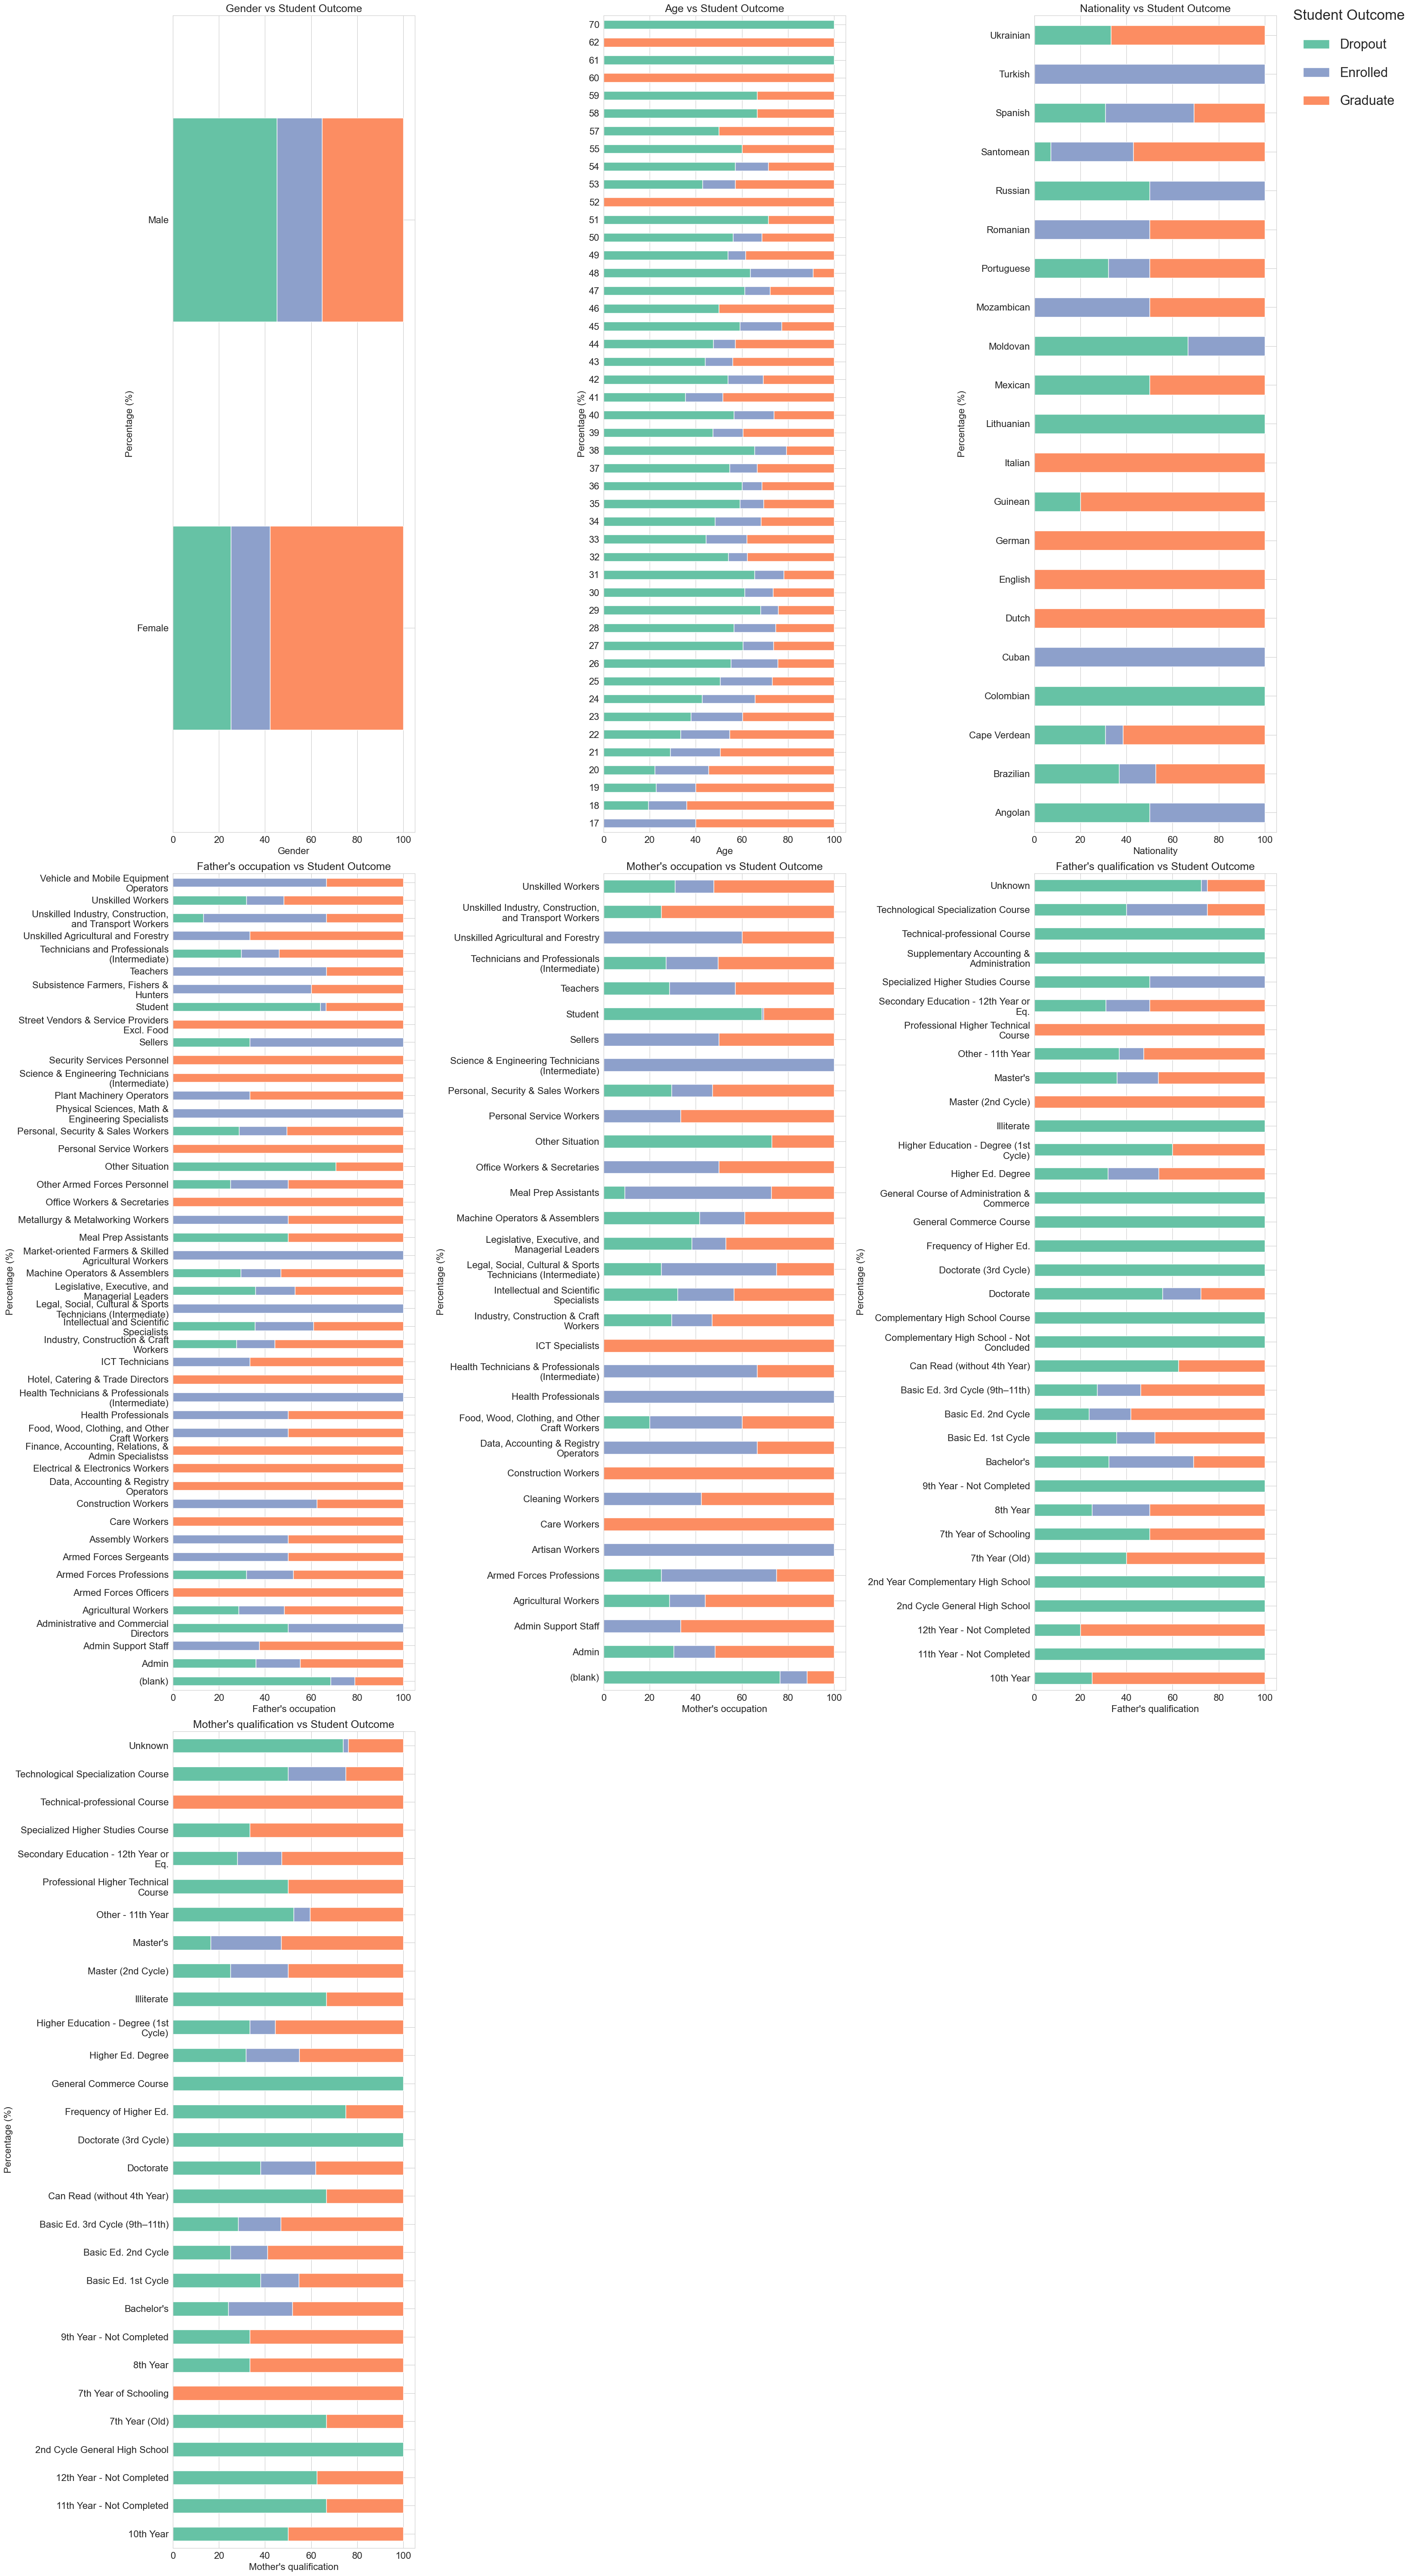

In [62]:
def faceted_stacked_bar(df, demographic_columns, mappings=feature_mappings, col_wrap=3, target_column='Student outcome'):
    """
    faceted_stacked_bar creates a grid of horizontal stacked bar plots 
    to visualise the percentage distribution of the target variable
    across demographic attributes.

    ---- Parameters ----
    :df: Specified pandas DataFrame containing the data to plot.
    :demographic_columns: List of demographic features to be plot.
    :mappings: Dictionary mapping numeric codes to descriptive labels (default = feature_mappings).
    :col_wrap: Number of plots per row in the faceted grid (default = 3).
    :target_column: Name of the target column (default = 'Student outcome').
    """
    df_stack = df.copy() # Create a copy
    outcomes = df_stack[target_column].unique() # student outcomes
    # Set mapped palette
    palette = dict(zip(outcomes, sns.color_palette("Set2", n_colors=len(outcomes)))) 

    # Map numeric codes to occupation mappings (descriptive names)
    for col in demographic_columns:
        try:
            df_stack[col] = df_stack[col].map(mappings[col])
        except KeyError:
            pass # No mappings found so continue
            
    # Number of attributes / plots per row
    rows = np.ceil(len(demographic_columns)/ col_wrap).astype('int')
    # Create subplots per specified column and number of plots
    fig, axes = plt.subplots(rows, col_wrap, figsize=(30, 20*rows))
    axes = axes.flatten()
    
    # Calculate number pf values per column and divide stacked bars
    for i, col in enumerate(demographic_columns):
        counts = df_stack.groupby([col, target_column]).size().reset_index(name='count')
        df_pivot = counts.pivot(index=col, columns=target_column, values='count').fillna(0)
        df_pivot = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100


        # Wrap long labels
        df_pivot.index = [textwrap.fill(str(label), width=35) for label in df_pivot.index]

        # Plot horizontal stacked bar
        df_pivot.plot(kind="barh", stacked=True, ax=axes[i], color=[palette[o] for o in df_pivot.columns])

        # Set plot axes, sizes, and titles
        axes[i].legend_.remove() # Remove individual legend
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0, wrap=True, ha="center")
        axes[i].tick_params(labelsize=16) 
        axes[i].set_ylabel("Percentage (%)", fontsize=16)
        axes[i].set_xlabel(col, fontsize=16)
        axes[i].set_title(f"{col} vs {target_column.title()}", fontsize=18)
    
    # Remove unused axes
    for j in range(len(demographic_columns), len(axes)):
        fig.delaxes(axes[j])
    
    # Create single legend with first plot's handles and labels
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(
        handles,
        labels,
        title=target_column.title(),
        loc='upper right',
        bbox_to_anchor=(1.10, 1.0),
        fontsize=22,
        title_fontsize=24,
        frameon=False,
        markerscale=2.0,
        labelspacing=1.2
    )

    # Display plot
    plt.subplots_adjust(right=0.15)
    plt.tight_layout()
    plt.show()

# List demographic columns
demographic_columns = ['Gender', 'Age', 'Nationality', 
                    "Father's occupation", "Mother's occupation", 
                    "Father's qualification", "Mother's qualification"]
faceted_stacked_bar(df_eda, demographic_columns)

#### Q2 - What is the impact of academic performance in the first semester on student dropout risk?

##### Violin Plot

C:\Users\evakt\AppData\Local\Temp\ipykernel_25944\2498770481.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




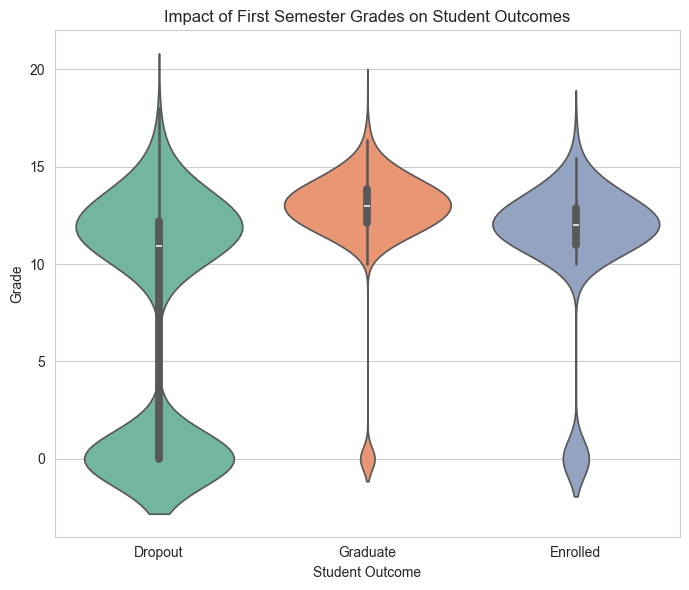

In [63]:
# First semester grades against student outcomes
# Copy relevant columns
df_temp = df_eda[["Student outcome", "Curricular units 1st sem (grade)", "Curricular units 2nd sem (grade)"]].copy()

# Violin Plot
plt.figure(figsize=(7,6))
sns.violinplot(data=df_temp, x="Student outcome", y="Curricular units 1st sem (grade)", palette="Set2")
plt.title("Impact of First Semester Grades on Student Outcomes")
plt.ylabel("Grade")
plt.xlabel("Student Outcome")
plt.tight_layout()
plt.show()

##### Split Violin Plot

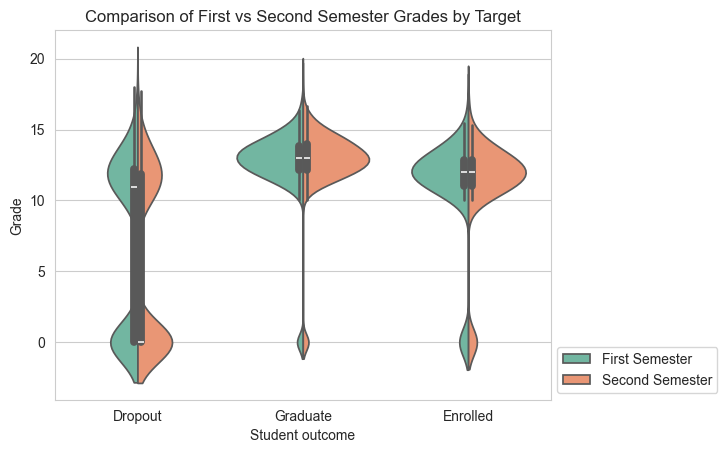

In [64]:
# Rename for clarity
df_temp.rename(columns={
    "Curricular units 1st sem (grade)": "First Semester",
    "Curricular units 2nd sem (grade)": "Second Semester"
}, inplace=True)

# Long format
df_melted = df_temp.melt(id_vars="Student outcome", 
                           value_vars=["First Semester", "Second Semester"],
                           var_name="Semester", value_name="Grade")

# Plot
sns.violinplot(data=df_melted, x="Student outcome", y="Grade", hue="Semester", split=True, palette="Set2")
plt.title("Comparison of First vs Second Semester Grades by Target")
plt.legend(loc="lower right", bbox_to_anchor=(1.35, 0))
plt.show()

#### Q3 - Do national economic factors influence student dropout risk?

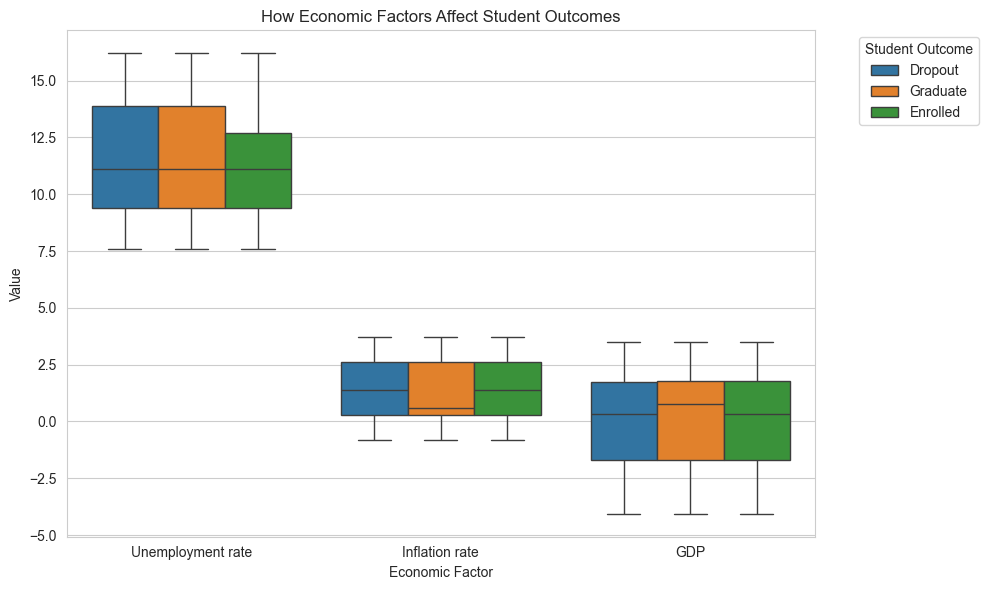

In [65]:
# Copy relevant columns
df_temp = df_eda[["Student outcome", "Unemployment rate", "Inflation rate", "GDP"]].copy()

# Melt df
df_melted = df_temp.melt(id_vars="Student outcome", 
                         var_name="Economic Factor", 
                         value_name="Value")
# Plot boxplots
plt.figure(figsize=(10,6))
sns.boxplot(data=df_melted, x="Economic Factor", y="Value", hue="Student outcome")
plt.title("How Economic Factors Affect Student Outcomes")
plt.ylabel("Value")
plt.legend(title="Student Outcome", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

### Multivariate Analysis

#### Correlation Heatmap

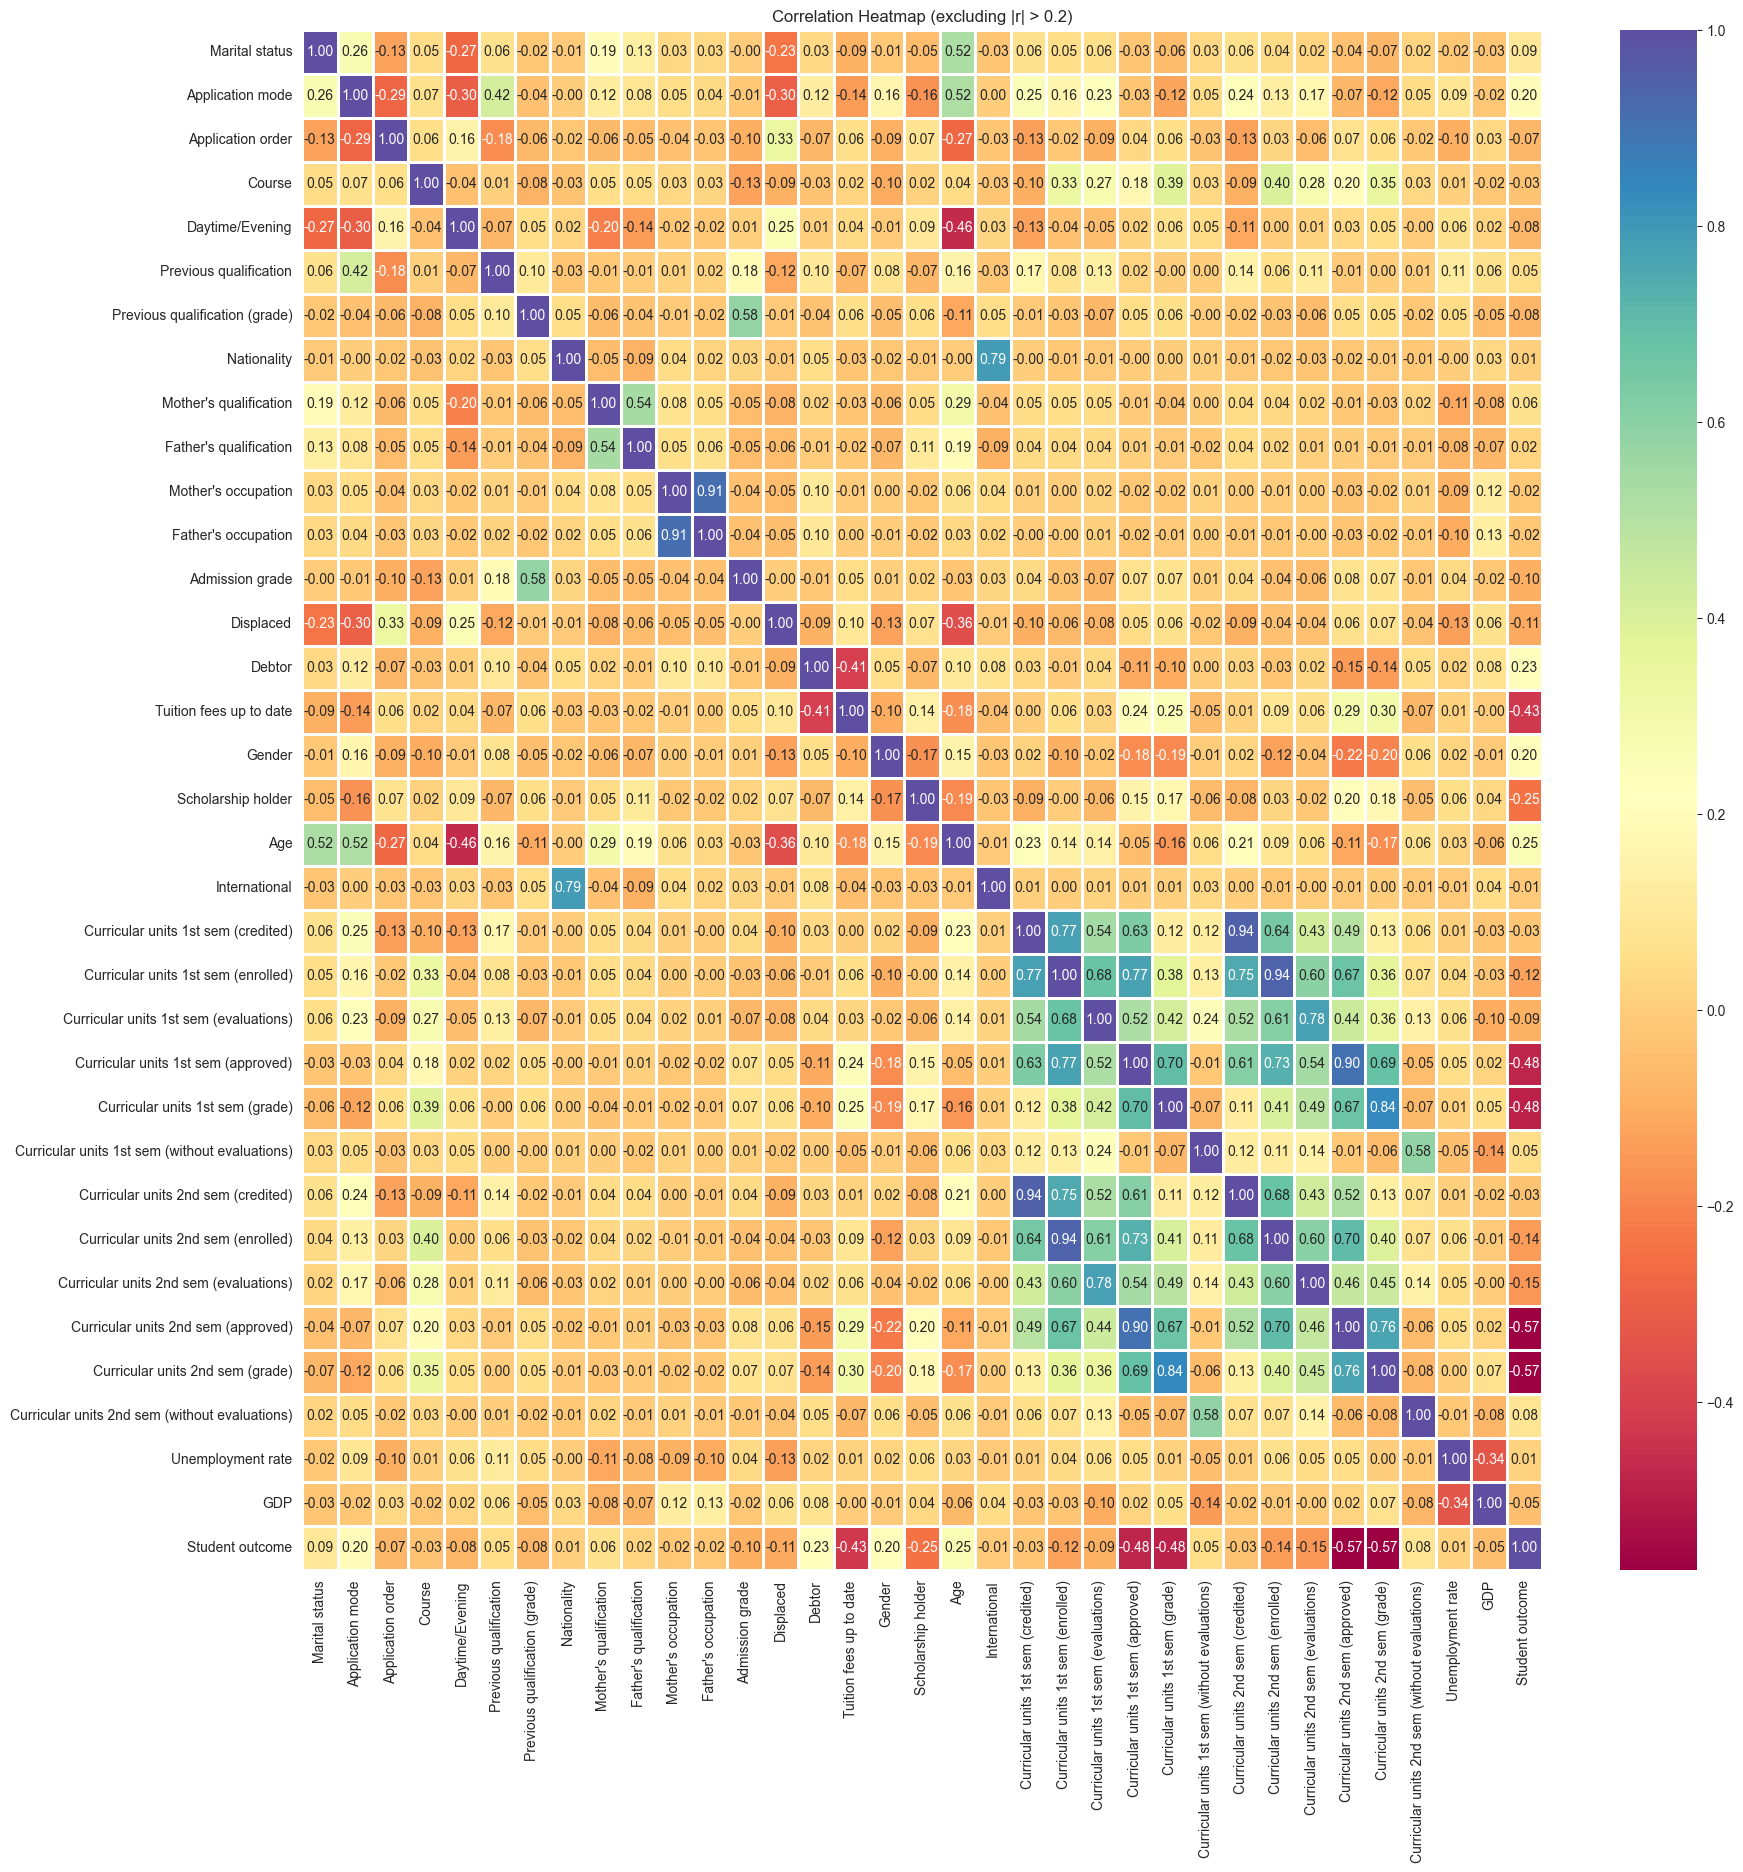

In [66]:
# Identify features with highest correlation to target variable
df_encoded = df_eda.copy()
# Binary encoding for correlation calculations (numeric only)
# Student Success (1) vs Dropout (0)
df_encoded['Student outcome'] = np.where(
    df_encoded['Student outcome'].isin(
    ['Engaged', 'Dropout']), 1, 0
)
# Compute correlation matrix
corr = df_encoded.corr()

# Threshold to exclude features too weak
threshold = 0.2

# Keep features with stronger correlations than theshold
mask = corr.apply(
    lambda col: col.drop(labels=[col.name]).abs().max() > threshold, axis=0
)
filtered_corr = corr.loc[mask, mask]

# Plot heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(filtered_corr, 
            annot=True, fmt='.2f', 
            cmap='Spectral', linewidths=1
            )
plt.title(f'Correlation Heatmap (excluding |r| > {threshold})')
plt.show()

## Data Preprocessing

### Data Cleaning

In [67]:
# Create copy to keep raw data for validation and reproducibility 
df_preprocessed = df_eda.copy(deep=True)

#### Null Values

In [68]:
# Replace identified (blank) and Unknown classes in columns with NaN values
def replace_blank_unknown(df, column_name):
    # 34 - Unknown - Qualification, 99 - (blank) - Occupation
    if "occupation" in column_name:
        df[column_name] = df[column_name].replace(99, np.nan)
    elif "qualification" in column_name:
        df[column_name] = df[column_name].replace(34, np.nan)
    else:
        pass

# Columns with unknown categories
na_columns = ["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"]

# Replace missing values
for col in na_columns:
    replace_blank_unknown(df_preprocessed, col)

# Check if  null values present in the dataset
df_preprocessed.isnull().any().any()

np.True_

<Axes: >

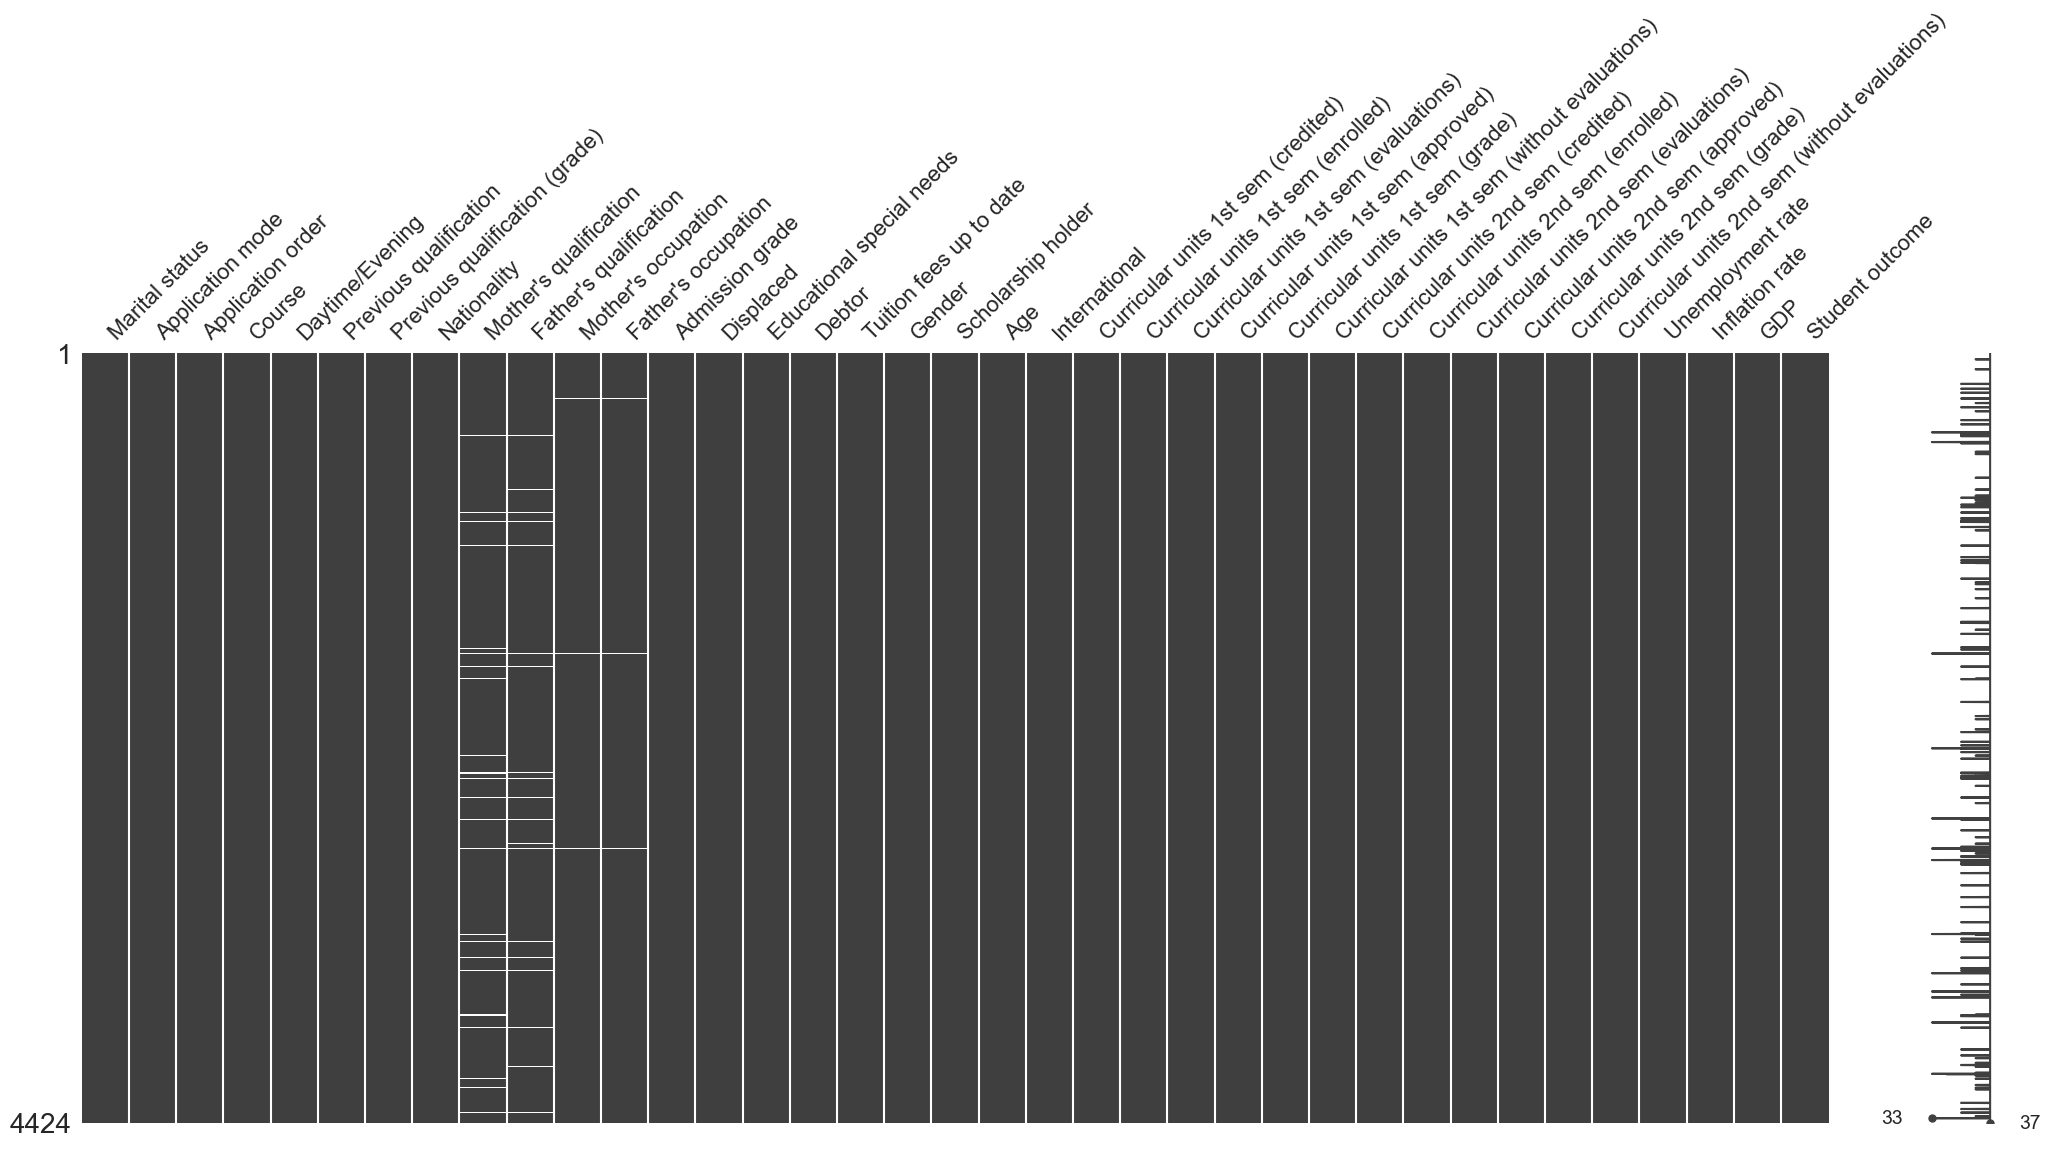

In [69]:
# Missing values plot
msno.matrix(df_preprocessed)

In [70]:
missing_percent = df_preprocessed.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
missing_percent

Mother's qualification    2.938517
Father's qualification    2.531646
Father's occupation       0.429476
Mother's occupation       0.384268
dtype: float64

### Target Re-labeling

In [71]:
# Combine 'Graduate' and 'Enrolled' - Student Success (Engaged) vs Dropout
df_preprocessed['Student outcome'] = df_preprocessed['Student outcome'].replace({
    'Graduate':'Engaged',
    'Enrolled':'Engaged',
    'Dropout':'Dropout'
})
# Check target variable's classes
df_preprocessed['Student outcome'].unique()

array(['Dropout', 'Engaged'], dtype=object)

### Target Encoding

In [72]:
# Identify categorical (non-continous) columns
list(set(df_preprocessed.columns) - set(df_preprocessed.describe().columns))

['Student outcome']

In [73]:
# Data prep
X = df_preprocessed.drop(columns=['Student outcome']) # All features excluding target (y)
y = df_preprocessed['Student outcome'] # Target/predictive feature

# Map categorical target variable to unique numerical variable with label encoding 
le = LabelEncoder() # Instantiate object

# Apply encoding of "Target" to train and test data 
y = le.fit_transform(y)

# Check encoding has applied
print(le.classes_, np.unique(y)) 

['Dropout' 'Engaged'] [0 1]


### Data Splitting

In [74]:
# Dataset Splitting 
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, # 80% train, 20% test
    stratify=y,      
    random_state=42 # Reproducible seed
)

# Validate Split
print(f'''Training Set
    Feature rows: {X_train.shape[0]}, Feature columns: {X_train.shape[1]}
    Target rows: {y_train.shape[0]} 
    Percentage: {X_train.shape[0]/df.shape[0]*100:.2g}%
Testing Set
    Feature rows: {X_test.shape[0]}, Feature columns: {X_test.shape[1]}
    Target rows: {y_test.shape[0]} 
    Percentage: {X_test.shape[0]/df.shape[0]*100:.2g}%
Original
    Rows: {df.shape[0]}, Columns: {df.shape[1]} ''')

Training Set
    Feature rows: 3539, Feature columns: 36
    Target rows: 3539 
    Percentage: 80%
Testing Set
    Feature rows: 885, Feature columns: 36
    Target rows: 885 
    Percentage: 20%
Original
    Rows: 4424, Columns: 37 


In [75]:
# Validate Split
print(f'''Training Set
    Feature rows: {X_train.shape[0]}, Feature columns: {X_train.shape[1]}
    Target rows: {y_train.shape[0]} 
    Percentage: {X_train.shape[0]/df.shape[0]*100:.2g}%
Testing Set
    Feature rows: {X_test.shape[0]}, Feature columns: {X_test.shape[1]}
    Target rows: {y_test.shape[0]} 
    Percentage: {X_test.shape[0]/df.shape[0]*100:.2g}%
Original
    Rows: {df.shape[0]}, Columns: {df.shape[1]} ''')

Training Set
    Feature rows: 3539, Feature columns: 36
    Target rows: 3539 
    Percentage: 80%
Testing Set
    Feature rows: 885, Feature columns: 36
    Target rows: 885 
    Percentage: 20%
Original
    Rows: 4424, Columns: 37 


### Mode Imputation

In [76]:
# Mode imputer 
imp = SimpleImputer(strategy="most_frequent")

# Fit to training data 
imp.fit(X_train)

# Transform train and test 
X_train = pd.DataFrame(imp.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imp.transform(X_test), columns=X_test.columns)

print("Null values present:", X_train.isnull().any().any())

Null values present: False


### Feature Engineering

#### Collapsing categories

In [77]:
# Aggregate nationalities
X_train["Nationality"] = (X_train["Nationality"] == 1).astype(int)
X_test["Nationality"] = (X_test["Nationality"] == 1).astype(int)

def collapse_codes(df, col, mapping):
    df[col] = df[col].replace(mapping)
    return df

# Course (Collapse same evening and day courses)
collapse_mapping = {
    9991: 9147,
    8014: 9238 
}
X_train = collapse_codes(X_train, "Course", collapse_mapping)
X_test  = collapse_codes(X_test, "Course", collapse_mapping)


### Scaling

In [78]:
# Fit scaler to training data
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
# Transform test with fitted scaler
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

### SMOTE Sampling

In [79]:
smote = SMOTE(random_state=42) # Reproducible
# Check SMOTE changes against original
y_train_orig = y_train.copy()
X_train_orig = X_train.copy()

# Apply SMOTE
X_train, y_train = smote.fit_resample(X_train, y_train)

# Back to df
X_train = pd.DataFrame(X_train, columns=X_train.columns)

# Before SMOTE 
print("Before SMOTE")
# y_train count
classes, counts = np.unique(y_train_orig, return_counts=True)
print("y_train class counts:")
for c, cnt in zip(classes, counts):
    print(f"Class {c}: {cnt}")

# After SMOTE
print("\nAfter SMOTE")
# y_train count
classes_res, counts_res = np.unique(y_train, return_counts=True)
print("y_train class counts:")
for c, cnt in zip(classes_res, counts_res):
    print(f"Class {c}: {cnt}")

# Before SMOTE 
print("\nBefore SMOTE")
# First 5 rows
print("First 5 rows:")
print(pd.DataFrame(X_train_orig, columns=X_train_orig.columns).head(3))
# After SMOTE
print("\nAfter SMOTE")
# First 5 rows
print("First 5 rows AFTER SMOTE:")
print(X_train.head(3))

Before SMOTE
y_train class counts:
Class 0: 1137
Class 1: 2402

After SMOTE
y_train class counts:
Class 0: 2402
Class 1: 2402

Before SMOTE
First 5 rows:
   Marital status  Application mode  Application order    Course  \
0             0.0               0.0           0.111111  0.014053   
1             0.0               0.0           0.222222  0.928106   
2             0.0               0.0           0.111111  0.937373   

   Daytime/Evening  Previous qualification  Previous qualification (grade)  \
0              1.0                     0.0                        0.473684   
1              1.0                     0.0                        0.389474   
2              1.0                     0.0                        0.221053   

   Nationality  Mother's qualification  Father's qualification  ...  \
0          1.0                0.418605                0.418605  ...   
1          1.0                0.000000                0.418605  ...   
2          1.0                0.860465         

## Model Development

### Model Setup

In [80]:
# Models to train
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss',  random_state=42),
    "SVM": SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42),
    "Naive Bayes": GaussianNB()
}

### Cross-Validation

In [81]:
# Cross-Validation - check performance on seen data 
cv_scoring = {
    "accuracy": "accuracy",
    "f1": "f1",
    "precision": "precision",
    "recall": "recall",
    "roc_auc": "roc_auc"
}

def stratified_cv(name, model, X, y, scoring=cv_scoring, n_splits=5, shuffle=True, random_state=42):
    """
    stratified_cv performs stratified k-fold cross-validation on a given model 
    and plots the mean and standard deviation of evaluation metrics.

    ---- Parameters ----
    :name: Model name.
    :model: ML estimator to be evaluated.
    :X: Predictor variables.
    :y: Target variable.
    :scoring: Evaluation metrics (default = cv_scoring).
    :n_splits: Number of folds for stratified k-fold (default = 5).
    :shuffle: Shuffle data before splitting (default = True).
    :random_state: Reproducibility (default = 42).
    """
    cv = StratifiedKFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state) # Splitter
    cv_scores = cross_validate(model, X, y, cv=cv, scoring=scoring) # Cross-Validation
    values_per_metric = [] # Values of all metrics per fold

    print(f"{name} Cross-Validation Results")
    for metric in scoring.keys(): # Metric per fold
        values = cv_scores['test_'+metric]
        values_per_metric.append(values)
        print(f"{metric:9s}: {values.mean():.4f} ± {values.std():.4f}")

    # Grouped bar chart for fold scores
    x = np.arange(len(list(scoring.keys())))
    width = 0.15
    fig, ax = plt.subplots(figsize=(10,6))

    # Plot each fold as a separate bar in each group
    for fold in range(n_splits):
        fold_scores = [values[fold] for values in values_per_metric]
        ax.bar(x + fold*width, fold_scores, width, label=f'Fold {fold+1}')

    # Format and plot graph
    ax.set_title(f"{name} - Cross-Validation Scores")
    ax.set_xticks(x + width*(n_splits-1)/2)
    ax.set_xticklabels(list(scoring.keys()))
    ax.set_ylabel("Score")
    ax.legend()
    ax.grid(axis='y', linestyle=':')
    plt.show()

In [82]:
# Confusion Matrix Heatmap 
def confusionMatrix(name, model, y_test, y_pred, ax=None):
    """
    confusionMatrix plots Confusion Matrix for fitted model and predictions.

    ---- Parameters ----
    :name: Model name.
    :model: Trained model.
    :y_test: True target labels (ground).
    :y_pred: Predicted labels.
    :ax: If axis provided subplots are created, if not standalone.
    """
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    # If ax is provided plot it with the ax (for subplots)
    if ax is not None:
        disp.plot(ax=ax, cmap='viridis', values_format='d')  # Whole number format 
        disp.ax_.grid(False) # Remove grid lines
        disp.ax_.set_title(f"{name} Confusion Matrix Heatmap")
    else:
        # Standalone plot
        disp.plot(cmap='viridis', values_format='d')  # Whole number format 
        disp.ax_.grid(False) # Remove grid lines
        plt.title(f"{name} Confusion Matrix Heatmap for Student Success Prediction")
        plt.show()

### Model Prediction

Random Forest Cross-Validation Results
accuracy : 0.9103 ± 0.0044
f1       : 0.9117 ± 0.0040
precision: 0.8977 ± 0.0088
recall   : 0.9263 ± 0.0070
roc_auc  : 0.9612 ± 0.0041


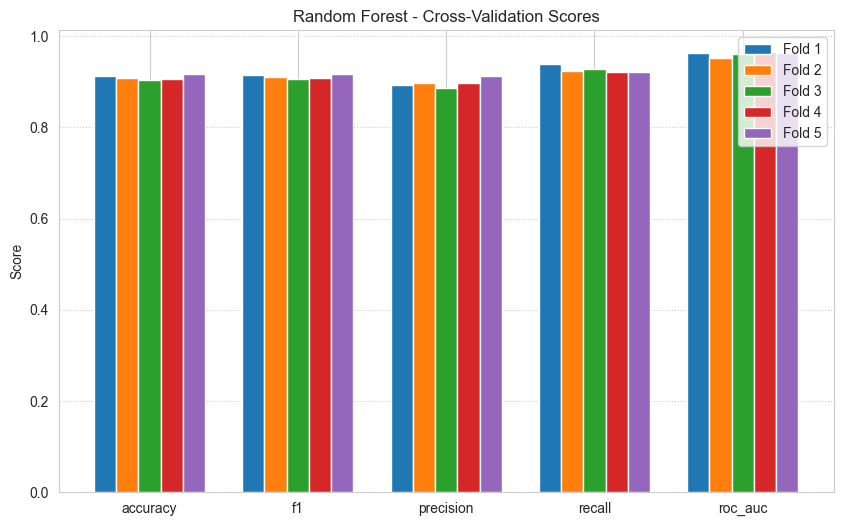

### Random Forest
**Accuracy Score:** 0.8745762711864407

**Classification Report:**
```
              precision    recall  f1-score   support

           0       0.84      0.76      0.79       284
           1       0.89      0.93      0.91       601

    accuracy                           0.87       885
   macro avg       0.86      0.84      0.85       885
weighted avg       0.87      0.87      0.87       885

```

XGBoost Cross-Validation Results
accuracy : 0.9038 ± 0.0043
f1       : 0.9059 ± 0.0042
precision: 0.8866 ± 0.0079
recall   : 0.9263 ± 0.0089
roc_auc  : 0.9614 ± 0.0037


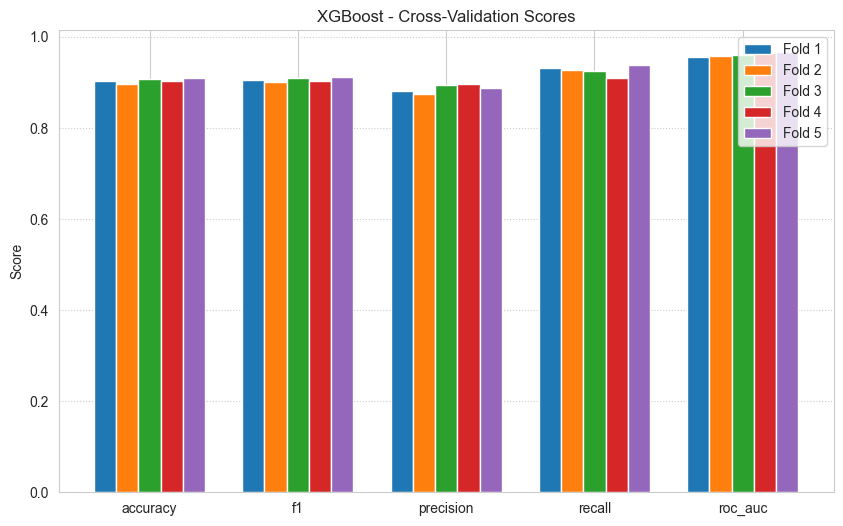

### XGBoost
**Accuracy Score:** 0.8553672316384181

**Classification Report:**
```
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       284
           1       0.88      0.92      0.90       601

    accuracy                           0.86       885
   macro avg       0.84      0.82      0.83       885
weighted avg       0.85      0.86      0.85       885

```

SVM Cross-Validation Results
accuracy : 0.8576 ± 0.0071
f1       : 0.8650 ± 0.0060
precision: 0.8229 ± 0.0121
recall   : 0.9117 ± 0.0092
roc_auc  : 0.9321 ± 0.0035


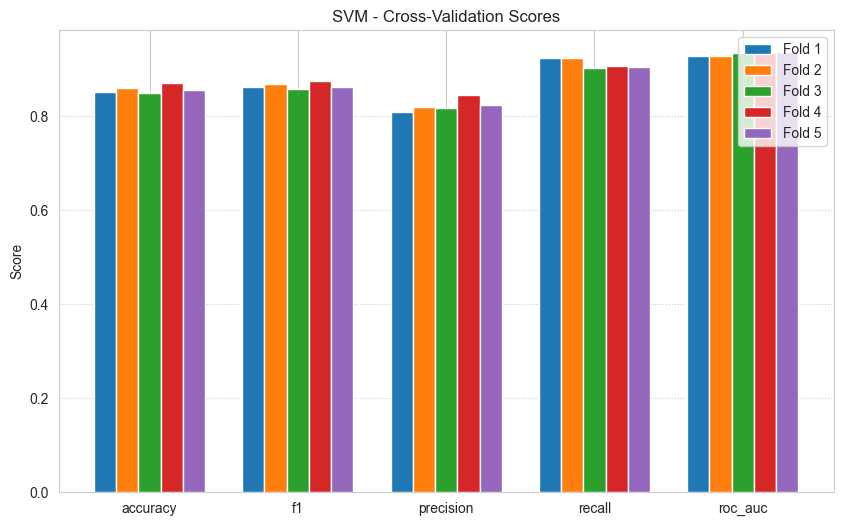

### SVM
**Accuracy Score:** 0.864406779661017

**Classification Report:**
```
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       284
           1       0.89      0.91      0.90       601

    accuracy                           0.86       885
   macro avg       0.85      0.84      0.84       885
weighted avg       0.86      0.86      0.86       885

```

Naive Bayes Cross-Validation Results
accuracy : 0.8006 ± 0.0130
f1       : 0.8064 ± 0.0116
precision: 0.7839 ± 0.0165
recall   : 0.8306 ± 0.0108
roc_auc  : 0.8600 ± 0.0146


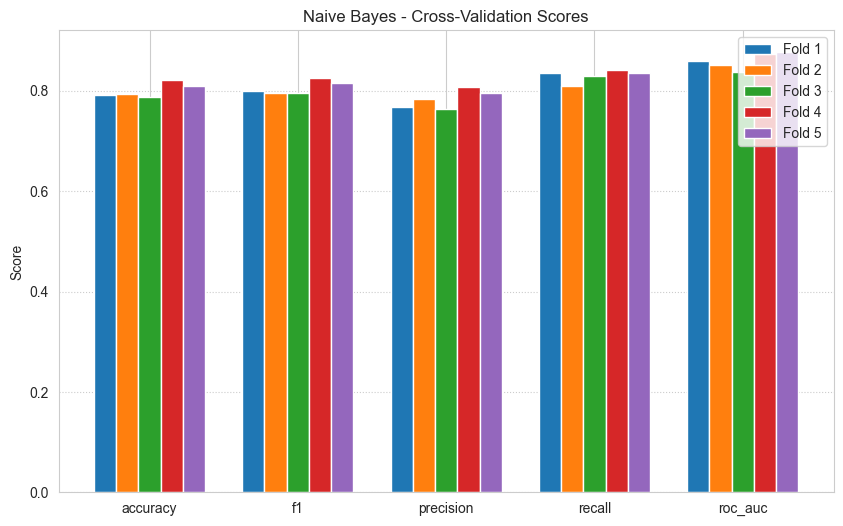

### Naive Bayes
**Accuracy Score:** 0.8112994350282486

**Classification Report:**
```
              precision    recall  f1-score   support

           0       0.69      0.75      0.72       284
           1       0.88      0.84      0.86       601

    accuracy                           0.81       885
   macro avg       0.78      0.79      0.79       885
weighted avg       0.82      0.81      0.81       885

```

In [83]:
for name, model in models.items(): 
    # StratifiedKFold Cross Validation 
    cv_scores = stratified_cv(name, model, X_train, y_train) 

    # Prediction 
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test) 

    # Check Accuracy Score and Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Untruncated readable display for comparison
    display(Markdown(f"### {name}\n**Accuracy Score:** {accuracy}\n\n**Classification Report:**\n```\n{report}\n```"))

# Hyperparameter Tuning

### Randomized Search

In [84]:
# Randomised parameter range for search
param_random = {
    "Random Forest": {
        "n_estimators": randint(50, 500),
        "max_depth": randint(2, 40),
        "min_samples_split": randint(2, 20),
        "min_samples_leaf": randint(1, 20),
        "max_features": ["sqrt", "log2", None]
    },
    "XGBoost": {
        "n_estimators": randint(50, 500),
        "max_depth": randint(2, 8),
        "learning_rate": loguniform(1e-2, 0.2),
        "subsample": uniform(0.7, 0.3),
        "colsample_bytree": uniform(0.7, 0.3),
        "gamma": uniform(0.0, 2.0),
        "reg_alpha": loguniform(1e-4, 1),
        "reg_lambda": loguniform(1e-4, 1)
    },
    "SVM": {
        "C": loguniform(1e-2, 1e2),
        "gamma": loguniform(1e-3, 1),
        "kernel": ["rbf"]
    },
    "Naive Bayes": {
        "var_smoothing": loguniform(1e-10, 1e-8)
    }
}

In [ ]:
cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42) # Splitter
scoring = "f1" # Scoring parameter to evaluate perf.

# Randomised parameter search 
def randomized_search(model, X, y, param_dist, n_iter, cv=cv, scoring=scoring):
    """
    randomized_search performs a randomised hyperparameter search with cross-validation.

    ---- Parameters ----
    :model: ML estimator to be tuned.
    :X: Predictor variavles.
    :y: Target variables.
    :param_dist: Parameter ranges to search.
    :n_iter: Search iterations.
    :cv: Cross-validation (default = cv).
    :scoring: Scoring metric to evaluate performance (default = scoring).
    """
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=n_iter,
        cv=cv,
        scoring=scoring,
        n_jobs=-1,
        random_state=42,
        verbose=1,
        refit=True,
        return_train_score=True
    )
    search.fit(X, y)
    return search

# Store randomised results
randomized_results = {}
for name, model in models.items():
    print(f"\nRunning RandomizedSearchCV for {name}...")
    rs = randomized_search(model, X_train, y_train, param_random[name], 40)
    randomized_results[name] = rs

# Check best parameter results
for name, rs in randomized_results.items():
    print(f"\n{name}: best_score={rs.best_score_:.4f}")
    print(f"\n{name}: best_params={rs.best_params_}")


Running RandomizedSearchCV for Random Forest...
Fitting 15 folds for each of 40 candidates, totalling 600 fits


# Performance Evaluation

In [ ]:
# Final model performance evaluations
for name, rs in randomized_results.items():
    # Retrieve model with best parameters
    best_model = rs.best_estimator_
    
    # Fit best model to training data
    best_model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = best_model.predict(X_test)
    
    # Accuracy Score and Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Untruncated readable display for comparison
    display(Markdown(f"### {name} (Tuned)\n**Accuracy Score:** {accuracy}\n\n**Classification Report:**\n```\n{report}\n```"))

    ########################## PLOTS ##########################

    # Classification Report Dictionary
    report =  classification_report(y_test, y_pred, output_dict=True)
    # Macro and weighted averages
    macro, weighted, accuracy = report['macro avg'], report['weighted avg'], report['accuracy']
    metrics = ['precision', 'recall', 'f1-score'] # Metrics to plot
    macro_avg = [macro[m] for m in metrics]
    weighted_avg = [weighted[m] for m in metrics]
    # Metrics
    scores = [score for score, metrics in report.items() 
              if isinstance(metrics, dict) and score not in 
              [ 'accuracy', 'macro avg', 'weighted avg']]
    # Prepare data for plotting
    x = np.arange(len(scores))  # the label locations
    # Extract metric values
    precision_vals = [report[score]['precision'] for score in scores]
    recall_vals = [report[score]['recall'] for score in scores]
    f1_vals = [report[score]['f1-score'] for score in scores]

    fig, axes = plt.subplots(1, 3, figsize=(24, 7))
    plt.tight_layout(pad=5.0)
    width = 0.35

    # Macro and Weighted Averages Bar Chart
    x = np.arange(len(metrics))
    axes[0].bar(x - width/2, macro_avg, width, label="Macro Avg")
    axes[0].bar(x + width/2, weighted_avg, width, label="Weighted Avg")
    # Accuracy reference line
    axes[0].axhline(y=accuracy, color='red', linestyle="--", linewidth=2, label=f"Accuracy ({accuracy:.4f})")
    # Titles
    axes[0].set_xticks(x)
    axes[0].set_xticklabels([m.title() for m in metrics])
    axes[0].set_ylabel('Score')
    axes[0].set_title(f"{name} (Tuned): Macro vs Weighted")
    axes[0].legend()
    # Value labels on top
    for i in x:
        axes[0].text(i - width/2, macro_avg[i] + 0.02, f"{macro_avg[i]:.2f}", ha='center')
        axes[0].text(i + width/2, weighted_avg[i] + 0.02, f"{weighted_avg[i]:.2f}", ha='center')

    # Metric scores per class of predicted variable
    # Plot and Bars
    x2 = np.arange(len(scores))

    axes[1].bar(x2 - width, precision_vals, width, label='Precision')
    axes[1].bar(x2, recall_vals, width, label='Recall')
    axes[1].bar(x2 + width, f1_vals, width, label='F1-score')
    # Labels 
    axes[1].set_xticks(x2)
    axes[1].set_xticklabels(scores)
    axes[1].set_xlabel("Target Class")
    axes[1].set_ylabel("Score")
    axes[1].set_title(f"{name} (Tuned): Per-Class Metrics")
    axes[1].legend(loc='lower left')

    # Value labels 
    for i in range(len(scores)):
        axes[1].text(x2[i] - width, precision_vals[i] + 0.01, f"{precision_vals[i]:.2f}", ha='center')
        axes[1].text(x2[i], recall_vals[i] + 0.01, f"{recall_vals[i]:.2f}", ha='center')
        axes[1].text(x2[i] + width, f1_vals[i] + 0.01, f"{f1_vals[i]:.2f}", ha='center')

        
    # Confusion Matrix
    confusionMatrix(name+' (Tuned)', best_model, y_test, y_pred, ax=axes[2])
    plt.show()

    ########################## SAVE MODEL ##########################
    # Pickle and save each model
    # Ensure the folder exists
    os.makedirs("models", exist_ok=True)
    filename = os.path.join("models", f"{name}_tuned_model.pkl")
    # Save model
    with open(filename, 'wb') as f:
        pickle.dump(best_model, f)
    print(f"Saved {name} tuned model to {filename}")

NameError: name 'randomized_results' is not defined

## Feature Importance

In [ ]:
# Load pickled model 
name = "Random Forest"
#filename = os.path.join("models", f"{name}_tuned_model.pkl")
with open(filename, "rb") as f:
    model = pickle.load(f)
# Feature Importance 
feature_importances = model.feature_importances_
features = X.columns
# Sort features by importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, hue=features, palette='viridis', dodge=False, legend=False)
# Add value labels
for i, (imp, feat) in enumerate(zip(importance_df['Importance'], importance_df['Feature'])):
    plt.text(imp, i, f'{imp:.3f}', va='center', fontsize=7)
plt.title('Feature Importance for Student Outcome Prediction', fontsize=10)
plt.xlabel('Importance', fontsize=9)
plt.ylabel('Feature', fontsize=9)
plt.show()

NameError: name 'filename' is not defined